In [1]:
%run -i 'cosim_import.py'
import csv
import multiprocessing

0.post4537.dev0+g3d8fb72
2.8.0


In [2]:
caseH = 18
ict = True
ecc = True
agc = True

%run -i 'cosim_setup_andes.py'

EVA: ts=18[H], 50000 EVs, Total Q=434.54 MWh
Online 14477, Q=362.27 MWh, SoC=0.7435
Power(MW): Pt=-39.0266, Pc=-39.0266, Pd=0.0
Ctrl: 0=7897; 1=6580; 
EVA: Load A from Aest.csv.
Working directory: "/Users/jinningwang/Documents/work/andes/jwang/notes"
> Loaded config from file "/Users/jinningwang/.andes/andes.rc"
> Loaded generated Python code in "/Users/jinningwang/.andes/pycode".
Generated code for <PQ> is stale.
Numerical code generation (rapid incremental mode) started...


Generating code for 1 models on 8 processes.


Saved generated pycode to "/Users/jinningwang/.andes/pycode"
> Reloaded generated Python code of module "pycode".
Generated numerical code for 1 models in 0.1765 seconds.
Parsing input file "/Users/jinningwang/Documents/work/andes/jwang/case/ieee39_ev2.xlsx"...
Input file parsed in 0.0732 seconds.
System internal structure set up in 0.0224 seconds.


In [3]:
# import joblib
# from joblib import Parallel, delayed

# Nt = 5000
# def rne(time):
#     sse1 = ev_ssm(ts=time, N=Nt, step=1, tp=40,
#                   lr=0.1, lp=60, seed=2022, name="EVA",
#                   is_report=False)
#     [frcu, frcd] = sse1.g_frc()
#     return [sse1.ts, frcu, frcd, sse1.ne]

# # # interval by minutes, 24H
# answer = Parallel(n_jobs=joblib.cpu_count())(delayed(rne)(i) for i in np.arange(1/60, 2, 5/60))

In [4]:
# sse1 = ev_ssm(ts=10, N=Nt, step=1, tp=40,
#                 lr=0.1, lp=60, seed=2022, name="EVA",
#                 is_report=False)
# sse1.g_frc()

In [5]:
# plt.style.use('ieee')
# frc = pd.DataFrame(np.array(answer), columns=['time', 'frcu', 'frcd', 'ne'])
# frc.time *= 60
# # newdf = pd.DataFrame(np.repeat(frc.iloc[range(0,1440,5)].values, 5, axis=0), columns=frc.columns)
# # frcn = frc[['frcu', 'frcd']] - newdf[['frcu', 'frcd']]
# frc.plot(x='time', y=['frcu', 'frcd'])

In [6]:
sse0 = ev_ssm(ts=caseH, N=50000, step=1, tp=20,
              lr=0.1, lp=60, seed=2022, name="EVA",
              n_pref=1, is_report=True,
              tt_mean=0.2, tt_var=0.05, tt_lb=0, tt_ub=0.4,
              ict=ict, ecc=ecc, agc=agc)

EVA: ts=18[H], 50000 EVs, Total Q=434.54 MWh
Online 14477, Q=362.27 MWh, SoC=0.7435
Power(MW): Pt=-39.0266, Pc=-39.0266, Pd=0.0
Ctrl: 0=7897; 1=6580; 


In [7]:
%run -i 'cosim_setup_dispatch.py'

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: On
   Sparse solver: KLU
 Solution method: NR method
Numba compilation initiated with caching.
Power flow initialized in 0.0926 seconds.
0: |F(x)| = 9.601680411
1: |F(x)| = 3.49745641
2: |F(x)| = 0.1830766445
3: |F(x)| = 0.0007183028649
4: |F(x)| = 1.659287863e-08
Converged in 5 iterations in 0.0035 seconds.
Power flow results are consistent. Conversion is successful.


Set parameter Username
Academic license - for non-commercial use only - expires 2023-04-08


-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: On
   Sparse solver: KLU
 Solution method: NR method
Numba compilation initiated with caching.
Power flow initialized in 0.0042 seconds.
0: |F(x)| = 9.601680411
1: |F(x)| = 3.49745641
2: |F(x)| = 0.1830766445
3: |F(x)| = 0.0007183028649
4: |F(x)| = 1.659287863e-08
Converged in 5 iterations in 0.0038 seconds.
Power flow results are consistent. Conversion is successful.
GSF is consistent.
RTED GB model is loaded.
RTED removed: ['rampu', 'rampd']
RTED limited: sfru, sfrd
RTED: total cost=4889.131


pp cost=2184.5741560778906, gb cost=4889.131241556355


In [8]:
%run -i 'cosim_linktable.py'

# Change ``rru``, ``rrd``, ``rsfr``, ``t_total`` for necessary.
t_total = 3600

rru, rrd, rsfr = 1.0, 1.0, 0.04

# Define functions and constants used in loop
%run -i 'cosim_const.py'

In [9]:
# SFR, with ict control
socf1 = pd.read_csv('cosim_18_F_ict_evsoc1.csv')
socf2 = pd.read_csv('cosim_18_F_ict_evsoc2.csv')
socfm = pd.concat([socf1, socf2], axis=0).reset_index(drop=True)

# SFR, without ict control
socfn1 = pd.read_csv('cosim_18_F_evsoc1.csv')
socfn2 = pd.read_csv('cosim_18_F_evsoc2.csv')
socfnm = pd.concat([socfn1, socfn2], axis=0).reset_index(drop=True)

# no SFR
socs1 = pd.read_csv('cosim_18_S_evsoc1.csv')
socs2 = pd.read_csv('cosim_18_S_evsoc2.csv')
socsm = pd.concat([socs1, socs2], axis=0).reset_index(drop=True)

pgf = pd.read_csv('cosim_18_F_ict_pg.csv')
pgs = pd.read_csv('cosim_18_S_pg.csv')
pgfn = pd.read_csv('cosim_18_F_pg.csv')
agcf = pd.read_csv('cosim_18_F_ict_agcm.csv')
agcs = pd.read_csv('cosim_18_S_agcm.csv')
agcfn = pd.read_csv('cosim_18_F_agcm.csv')
outf = pd.read_csv('cosim_18_F_ict_out.csv')
outs = pd.read_csv('cosim_18_S_out.csv')
outfn = pd.read_csv('cosim_18_F_out.csv')
outf['fd'] = outf['freq'] - ssa.config.freq
outs['fd'] = outs['freq'] - ssa.config.freq
outfn['fd'] = outfn['freq'] - ssa.config.freq

evf = pd.read_csv('cosim_18_F_ict_sse.csv')
evs = pd.read_csv('cosim_18_S_sse.csv')
evfn = pd.read_csv('cosim_18_F_sse.csv')
evdf = pd.read_csv('cosim_18_F_ict_evdata.csv')
evds = pd.read_csv('cosim_18_S_evdata.csv')
evdfn = pd.read_csv('cosim_18_F_evdata.csv')

sfrf = pd.read_csv('cosim_18_F_ict_sfr.csv')
sfrs = pd.read_csv('cosim_18_S_sfr.csv')
sfrfn = pd.read_csv('cosim_18_F_sfr.csv')

evagcf = pd.read_csv('cosim_18_F_ict_evagc.csv').T
evsocf = socfm.T
evsocf.sort_values(by=['0'], axis=1, inplace=True)
evagcs = pd.read_csv('cosim_18_S_evagc.csv').T
evsocs = socsm.T
evsocs.sort_values(by=['0'], axis=1, inplace=True)
evagcfn = pd.read_csv('cosim_18_F_evagc.csv').T
evsocfn = socfnm.T
evsocfn.sort_values(by=['0'], axis=1, inplace=True)

reader = csv.reader(open('cosim_18_F_ict_rted.csv', 'r'))
rted_res = {}
for row in reader:
   k, v = row
   rted_res[k] = v

<AxesSubplot:xlabel='Time'>

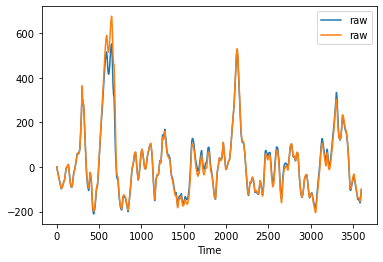

In [10]:
ACE_integral = 0
ACE_raw = 0
raw = -1 * np.ones((3600, 3))
for end_time in range(3600):
    acep = outs['ACE'][(outs['Time'] >= end_time-0.03)&(outs['Time'] <= end_time)].mean()
    ACE_integral += acep
    ACE_raw = -(Kp*acep + Ki*ACE_integral)
    raw[end_time] = [end_time, ACE_raw, ACE_integral]
raws = pd.DataFrame(raw, columns=['Time', 'raw', 'itg'])
    
ACE_integral = 0
ACE_raw = 0
raw = -1 * np.ones((3600, 3))
for end_time in range(3600):
    acep = outf['ACE'][(outf['Time'] >= end_time-0.03)&(outf['Time'] <= end_time)].mean()
    ACE_integral += acep
    ACE_raw = -(Kp*acep + Ki*ACE_integral)
    raw[end_time] = [end_time, ACE_raw, ACE_integral]
rawf = pd.DataFrame(raw, columns=['Time', 'raw', 'itg'])

fig, ax = plt.subplots()
raws.plot(x='Time', y='raw', fig=fig, ax=ax)
rawf.plot(x='Time', y='raw', fig=fig, ax=ax)

In [11]:
import matplotlib.font_manager

In [84]:
d_syn

time          h10          h18      a10         a18
0        0  4978.800000  7459.500000  612.180  -61.090000
1        1  4978.758667  7459.455333  607.398  -62.437333
2        2  4978.717333  7459.410667  602.616  -63.784667
3        3  4978.676000  7459.366000  597.834  -65.132000
4        4  4978.634667  7459.321333  593.052  -66.479333
...    ...          ...          ...      ...         ...
3595  3595  5236.523333  7745.296667 -130.050 -245.356667
3596  3596  5236.958667  7745.397333 -135.952 -244.781333
3597  3597  5237.394000  7745.498000 -141.854 -244.206000
3598  3598  5237.829333  7745.598667 -147.756 -243.630667
3599  3599  5238.264667  7745.699333 -153.658 -243.055333

[3600 rows x 5 columns]

ANDES total load is: 58.564 p.u.


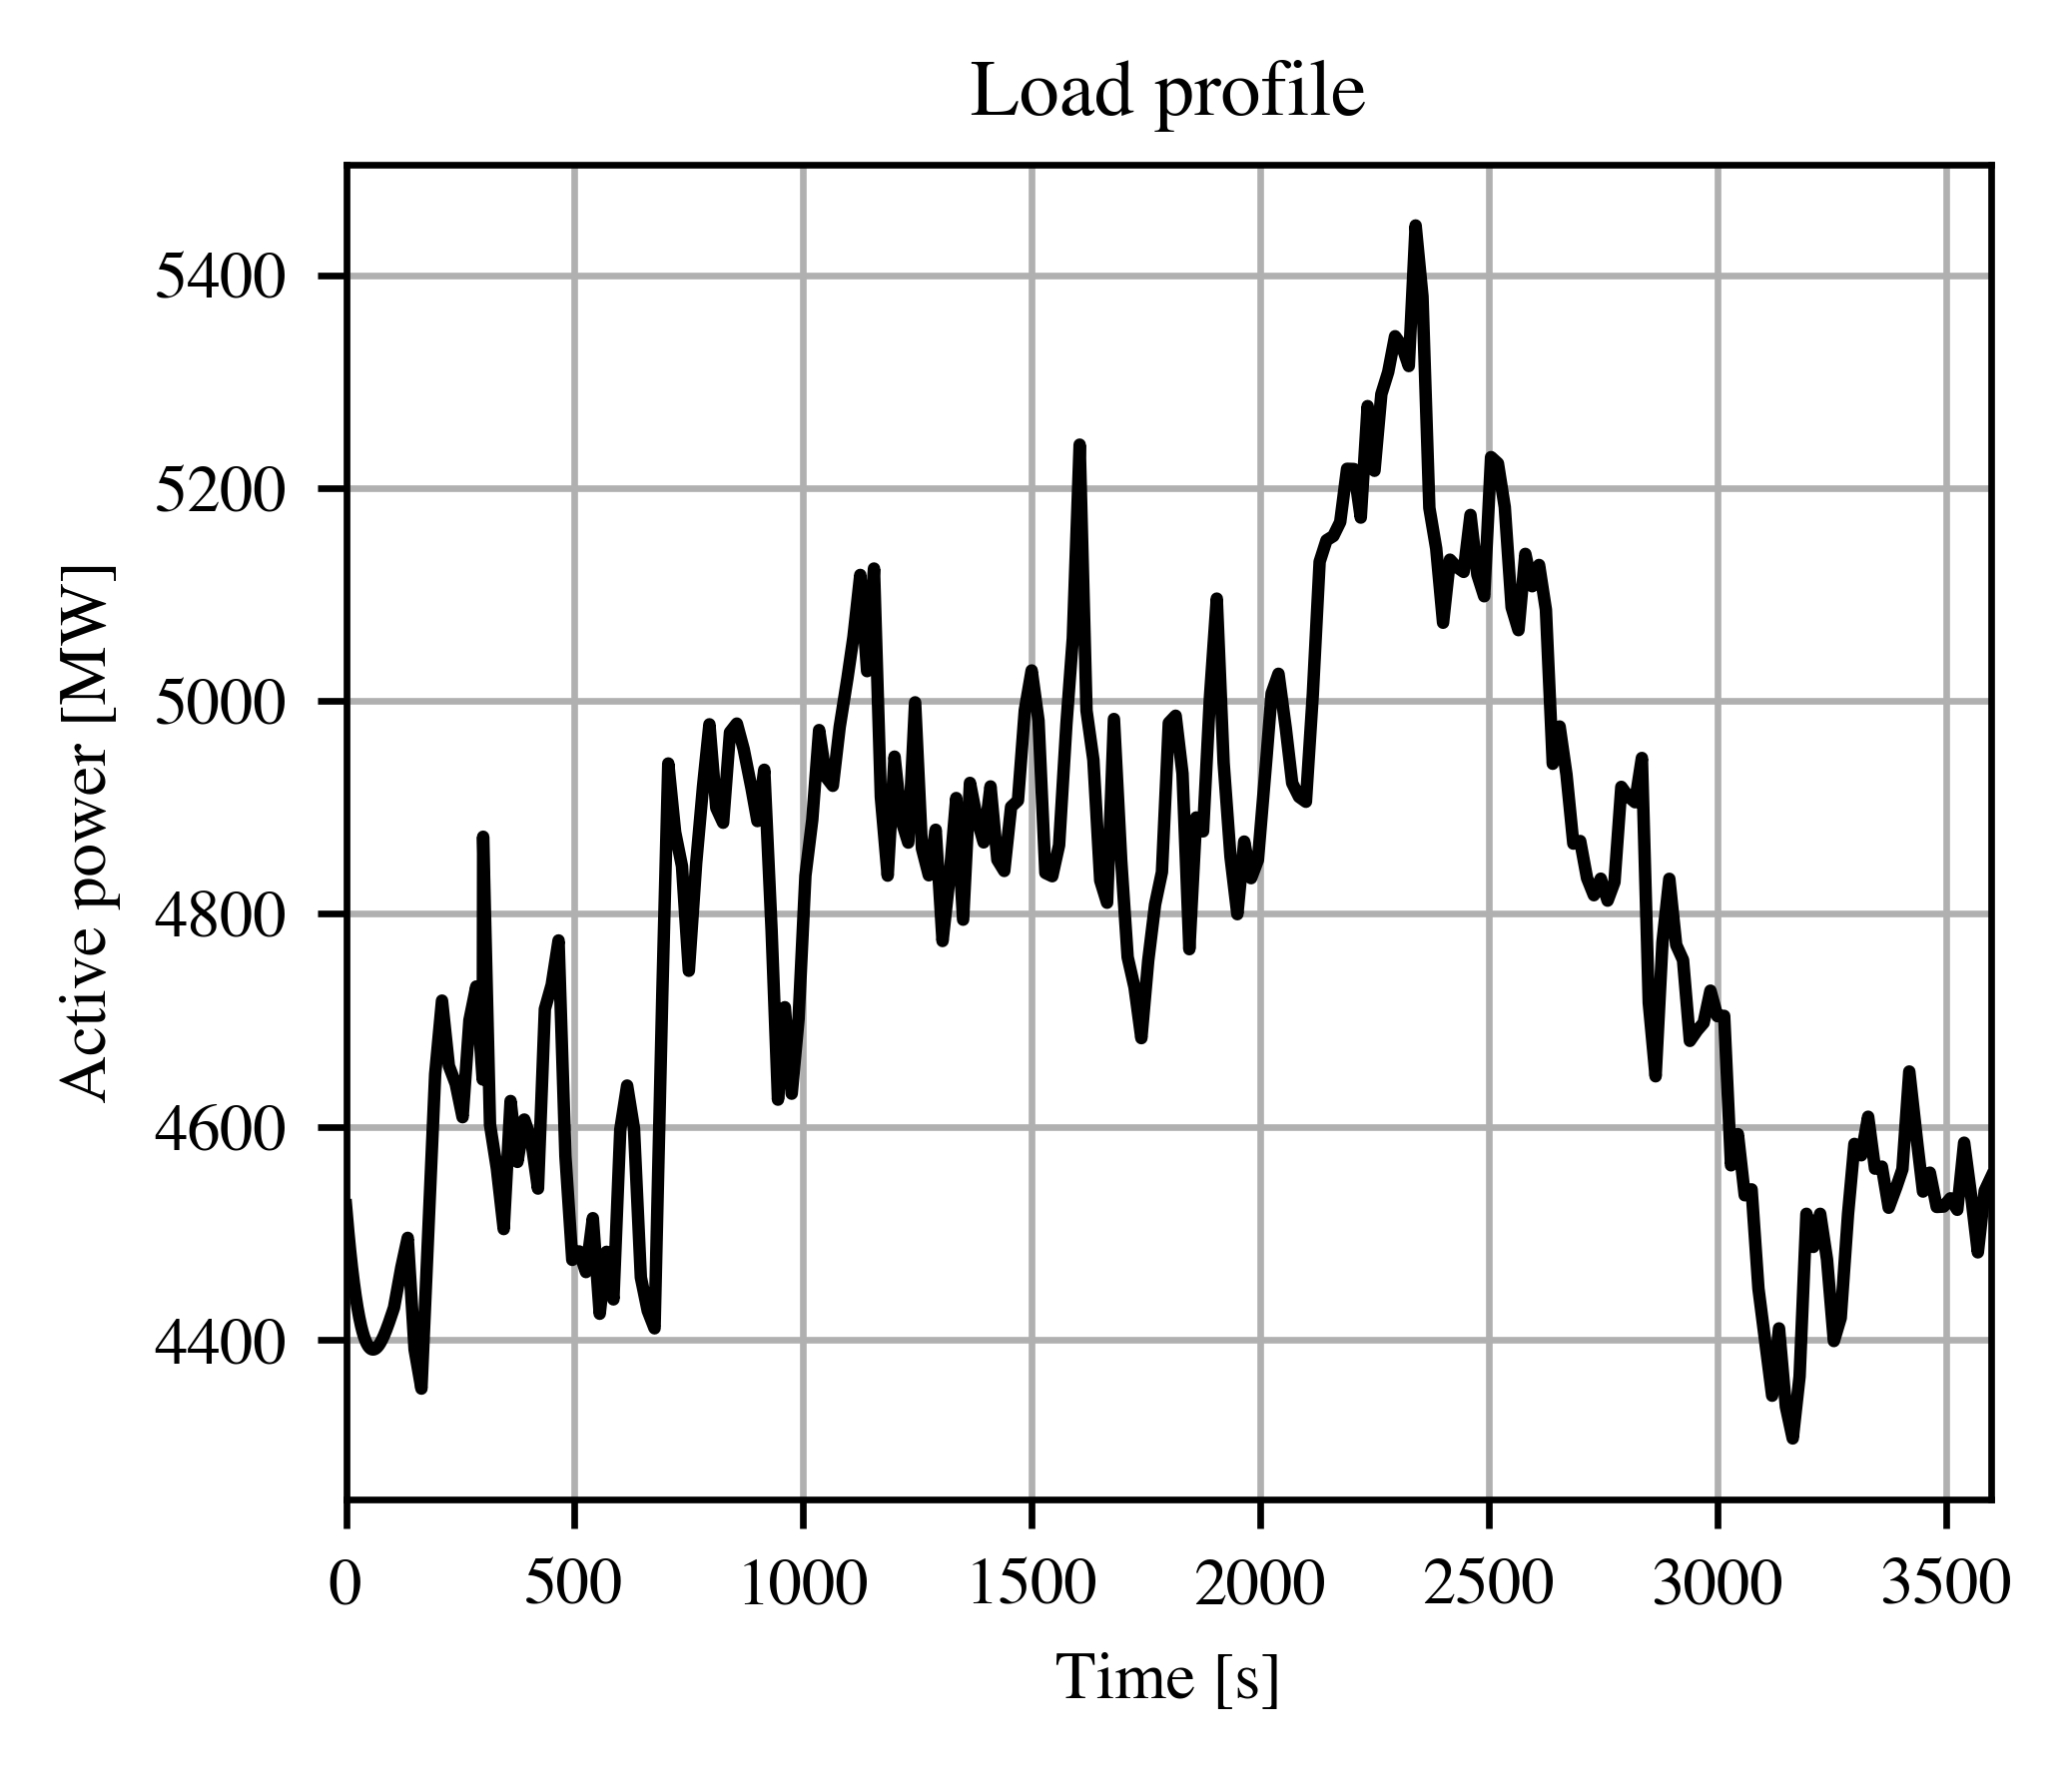

In [95]:
ptotal = ssa.PQ.as_df()['p0'].sum()
print('ANDES total load is:',ptotal.round(4),'p.u.')

# --- scale load curve ---
ddata_path = '/case/dsyn.csv'
ddata = dir_path + ddata_path
d_syn = pd.read_csv(ddata)

caseH = 18

np.random.seed(2022)
col = ['h10', 'h18', 'a10', 'a18']
col1 = ['h10', 'h18']
col2 = ['a10', 'a18']
# d_syn['a10'].iloc[200:650] *= 0.5
d_syn[col1] = (d_syn[col1] - d_syn[col1].min()) / d_syn[col1].min() + 0.8
d_syn[col2] = (d_syn[col2] - d_syn[col2].mean()) / (d_syn[col2].max() - d_syn[col2].min())

if caseH == 10:
    k = 0.4  # the coefficient can be adjusted to fit the case
    d_syn['s10'] = d_syn['h10'] + k * d_syn['a10']
    d_syn['s18'] = d_syn['h18'] + k * d_syn['a18']
    d_syn['sload'] = d_syn['s10']
    # d_syn['sload'] = d_syn['sload'].rolling(10).mean().interpolate(method='polynomial', order=1, inplace=False)
    # d_syn['sload'].iloc[0:310] -= 0.05 * k / 0.3
    # # d_syn['sload'].iloc[250:350] = None
    # # d_syn['sload'].iloc[250:350].interpolate(method='polynomial', order=3, inplace=True)
    # d_syn['sload'].iloc[400:650] += 2 * (0.8 - d_syn['sload'].iloc[300:600])
    # d_syn['sload'].iloc[600:900] += 0.02 * k / 0.3
    # # d_syn['sload'].iloc[450:650] = None
    # # d_syn['sload'].iloc[450:650].interpolate(method='polynomial', order=9, inplace=True)
    # d_syn['sload'].iloc[900:1200] += 0.03 * k / 0.3
    # d_syn['sload'].iloc[1200:1800] -= 0.06 * k / 0.3
    # d_syn['sload'].iloc[2100:2400] += 0.02 * k / 0.3
    # d_syn['sload'].iloc[2700:3000] -= 0.03 * k / 0.3
    # d_syn['sload'].iloc[3300:3600] += 0.05 * k / 0.3
if caseH == 18:
    k = 0.2  # the coefficient can be adjusted to fit the case
    d_syn['s10'] = d_syn['h10'] + k * d_syn['a10']
    d_syn['s18'] = d_syn['h18'] + k * d_syn['a18']
    d_syn['sload'] = d_syn['s18']
    d_syn['sload'].iloc[0:300] -= 0.2 * k
    # d_syn['sload'].iloc[200:700] = d_syn['sload'].iloc[200:700].rolling(80).mean()

    # d_syn['sload'] = d_syn['sload'].rolling(10).mean().interpolate(method='polynomial', order=1, inplace=False)
    # d_syn['sload'].iloc[100:600] = d_syn['sload'].iloc[100:600].rolling(10).mean().interpolate(method='polynomial', order=1, inplace=False)

avg = d_syn['sload'].rolling(70).mean()
    
# calculate expected load
step = 300
d_exp = d_syn.groupby(d_syn.index // step).mean().copy()
d_exp['time'] = range(0,3600,300)

# align starting point of load with starting point of dispatch results
d_syn['sload'][0] = d_exp['sload'].iloc[0]
d_syn['sload'][1:100] = None
d_syn['sload'] = d_syn['sload'].interpolate(method='polynomial', order=3)

plt.style.use('ieee')
# --- plot load curve ---
fig_load, ax_load = plt.subplots(figsize=(3.5, 3))
ax_load.plot(d_syn['time'], ptotal * ssa.config.mva * d_syn['sload'], linestyle='-')
ax_load.set_xlim([0, 3600])
ax_load.set_ylabel('Active power [MW]')
ax_load.set_xlabel('Time [s]')
ax_load.set_title('Load profile')
ax_load.grid()
plt.tight_layout()
# fig_load.savefig("load_curve.png", bbox_inches="tight")

tf         ts     tstay
0      18.999722  18.000000  0.999722
1      18.999722  18.000000  0.999722
2      18.999722  18.000000  0.999722
3      18.999722  18.000000  0.999722
4      18.999722  18.000000  0.999722
...          ...        ...       ...
17368  18.999722  18.000000  0.999722
17369  18.999722  18.275856  0.723866
17370  18.999722  18.000000  0.999722
17371  18.999722  18.000000  0.999722
17372  18.999722  18.573999  0.425723

[17373 rows x 3 columns]

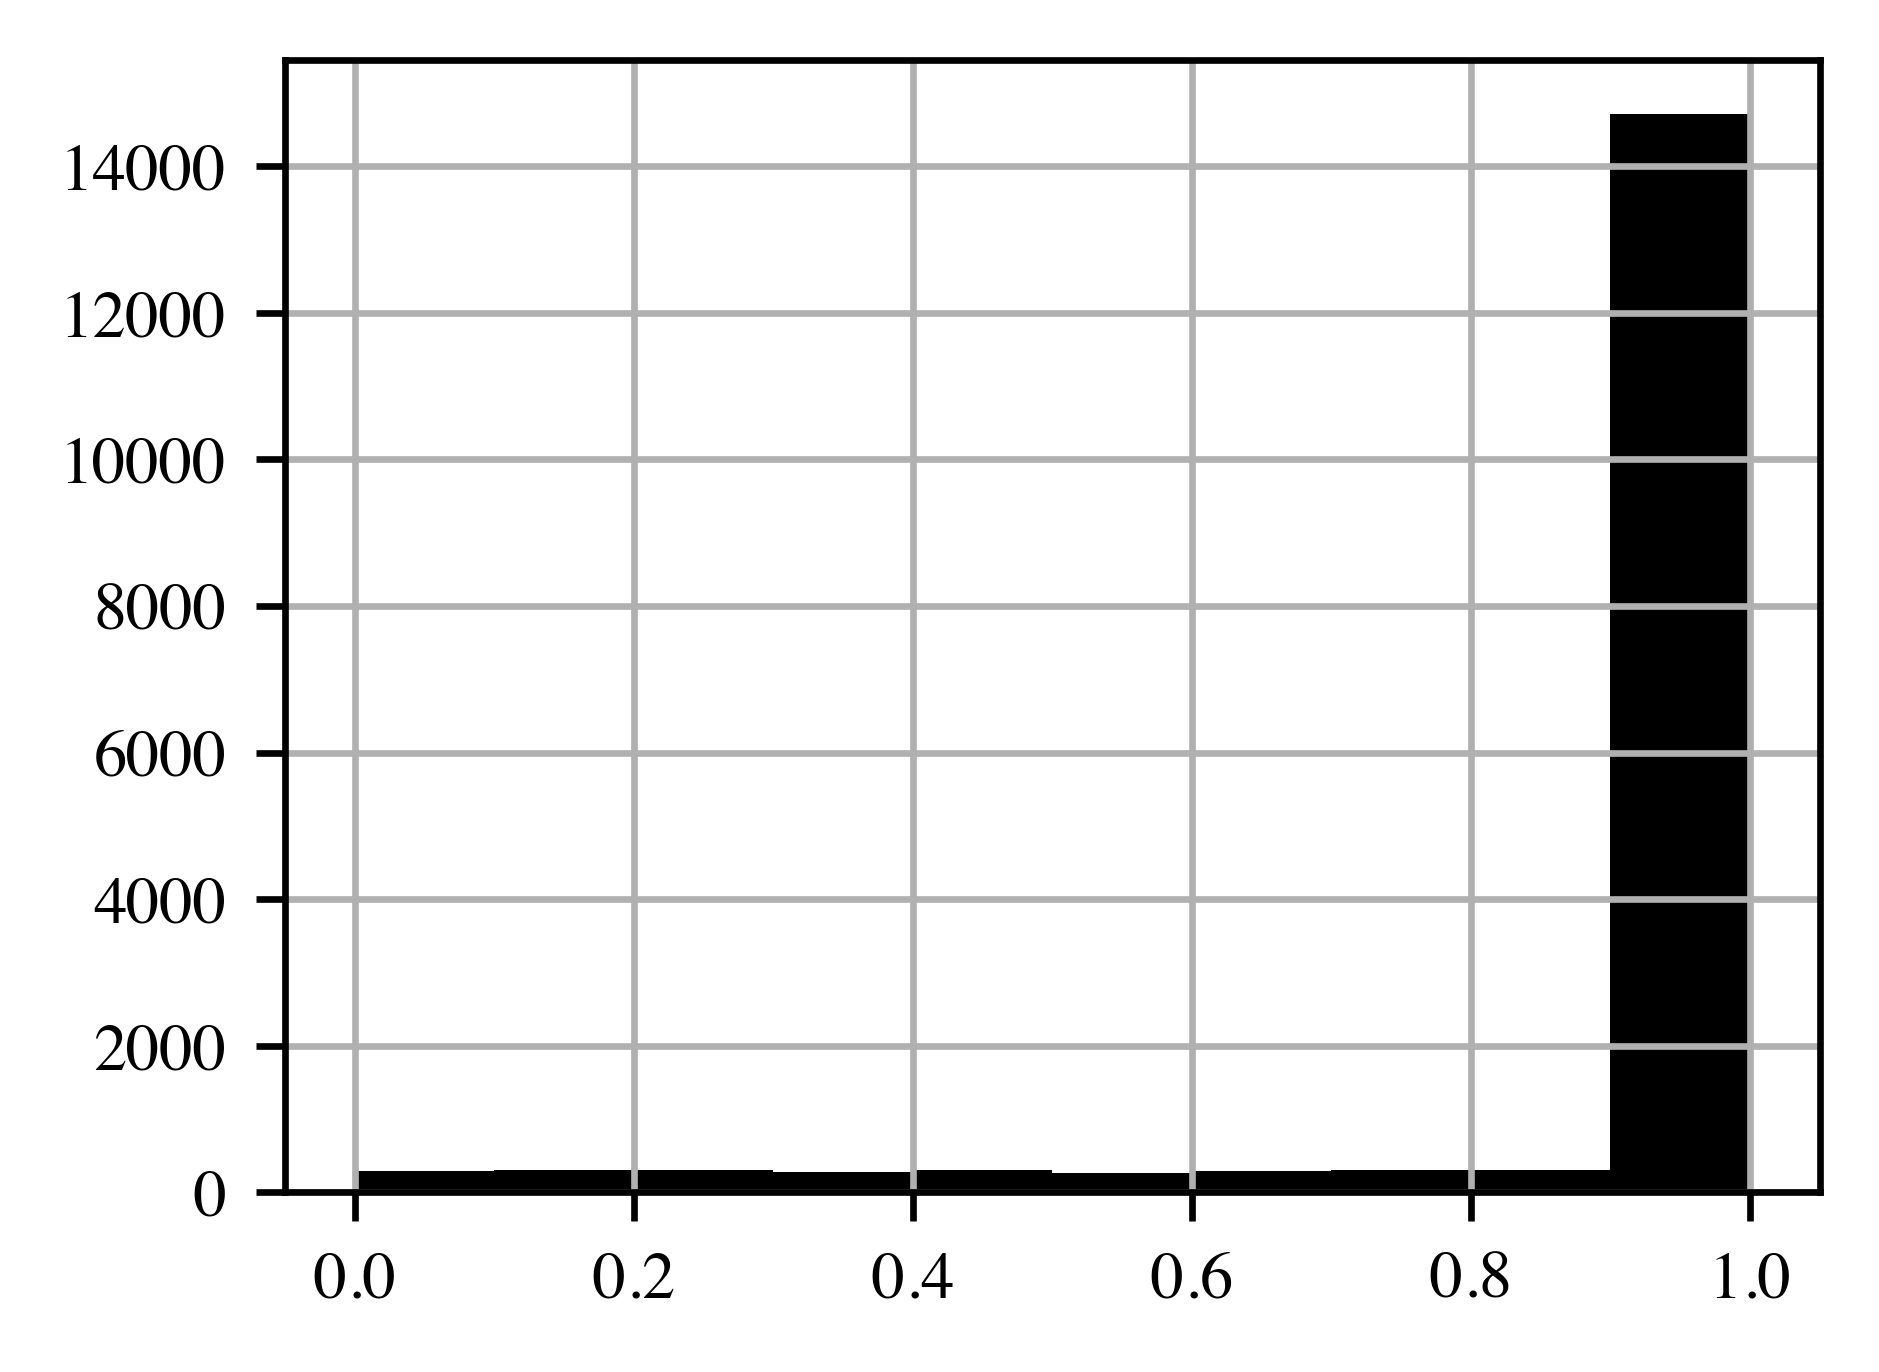

In [103]:
data['tstay'] = data['tf'] - data['ts']
data['tstay'].hist()
data[['tf', 'ts', 'tstay']]

In [101]:
data[data['gapt'] < 0][['na', 'nam', 'ict', 'tt', 'soc0', 'soc', 'socd']]

na   nam       ict        tt      soc0       soc      socd
151    2038  2602  0.215556  0.204130  0.642101  0.797475  0.802476
165    2509  2906  0.281111  0.188068  0.636492  0.790639  0.792847
390    2171  3262  0.251111  0.218479  0.606250  0.788570  0.811078
475    2820  3395  0.290000  0.225162  0.632300  0.813668  0.815084
537    2916  2916  0.324444  0.258090  0.642882  0.793029  0.834810
...     ...   ...       ...       ...       ...       ...       ...
17035  2948  3518  0.275556  0.254017  0.629065  0.824646  0.832372
17113  2767  2767  0.312222  0.190635  0.650190  0.791960  0.794385
17165  3120  3119  0.302222  0.280189  0.657558  0.824120  0.848017
17186  2232  3584  0.224444  0.220379  0.598138  0.809856  0.812217
17194  2508  2508  0.293056  0.199494  0.656082  0.792283  0.799697

[169 rows x 7 columns]

<AxesSubplot:>

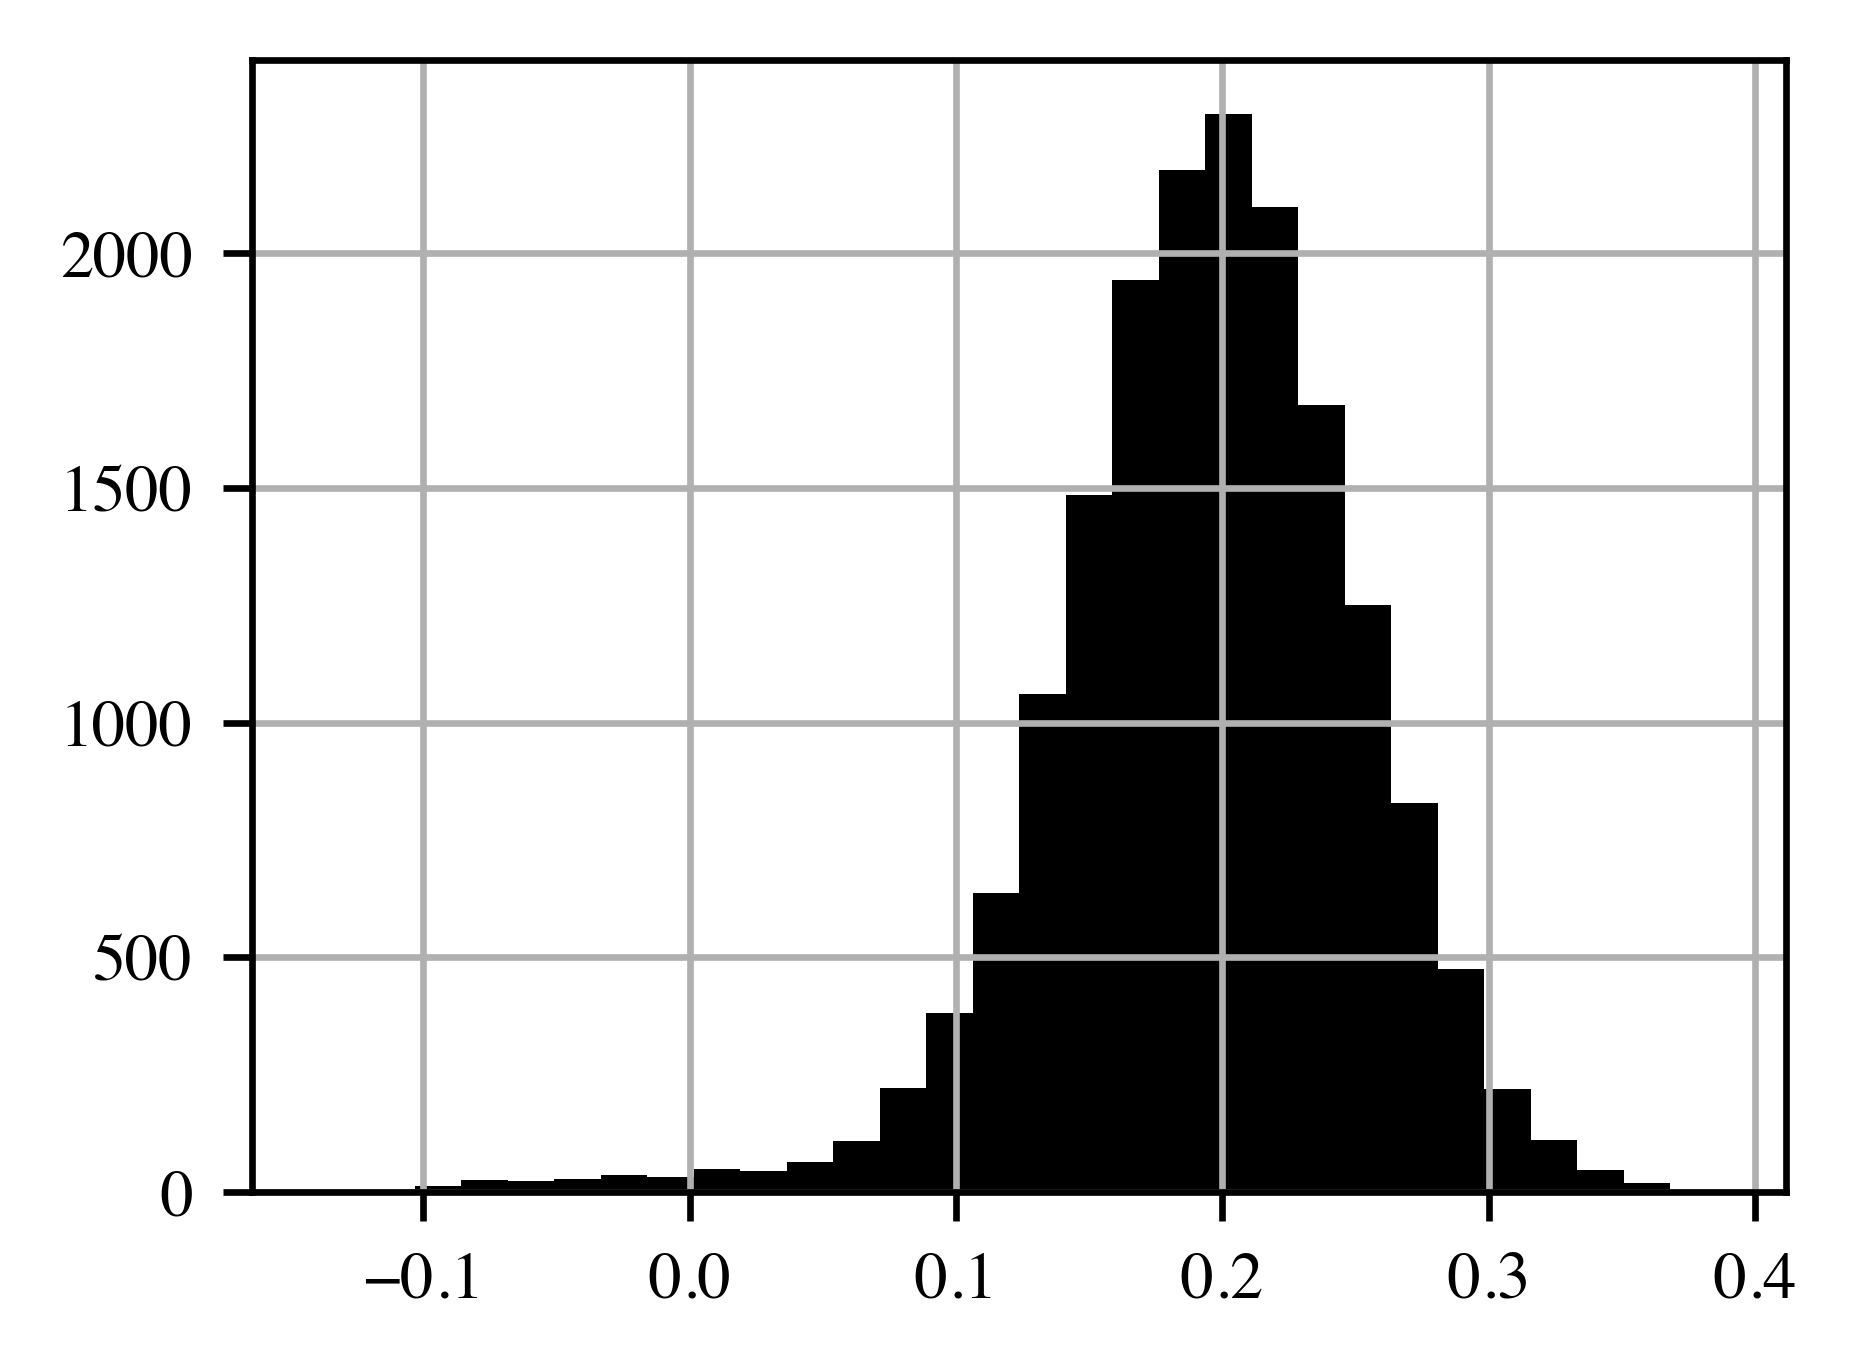

In [100]:
data = evdf
data[['tt', 'ict']][data['ict'] <= data['tt']]
data['gapt'] = data['tt'] - data['ict']
data['gapt'].hist(bins=30)

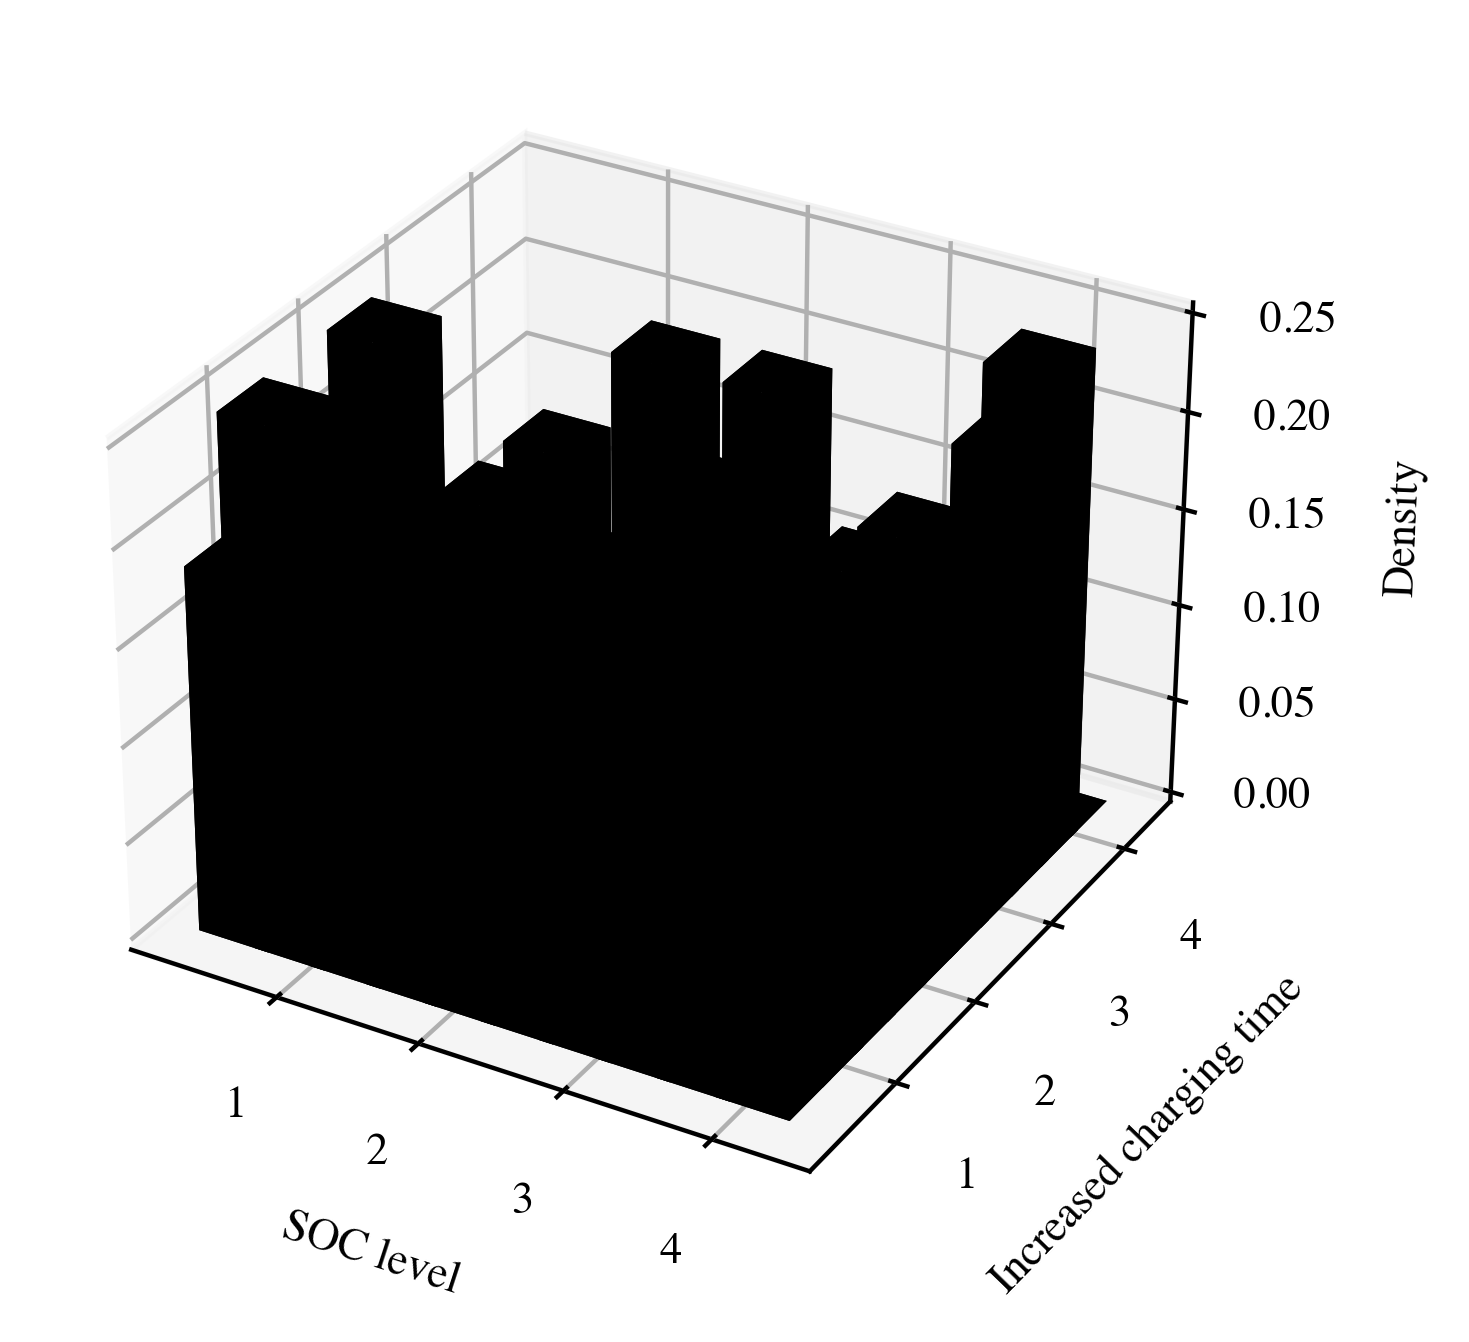

In [14]:
fig = plt.figure(figsize=(4,4), dpi=400)
ax = fig.add_subplot(111, projection='3d')

x, y = np.random.rand(2, 100) * 4
hist, xedges, yedges = np.histogram2d(x, y, bins=10, range=[[0, 4], [0, 4]], density=True)

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

ax.set_xlabel('SOC level')
ax.set_ylabel('Increased charging time')
ax.set_zlabel('Density')
plt.show()

/Users/jinningwang/Documents/work/mambaforge/envs/andes/lib/python3.9/site-packages/pandas/core/indexes/base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


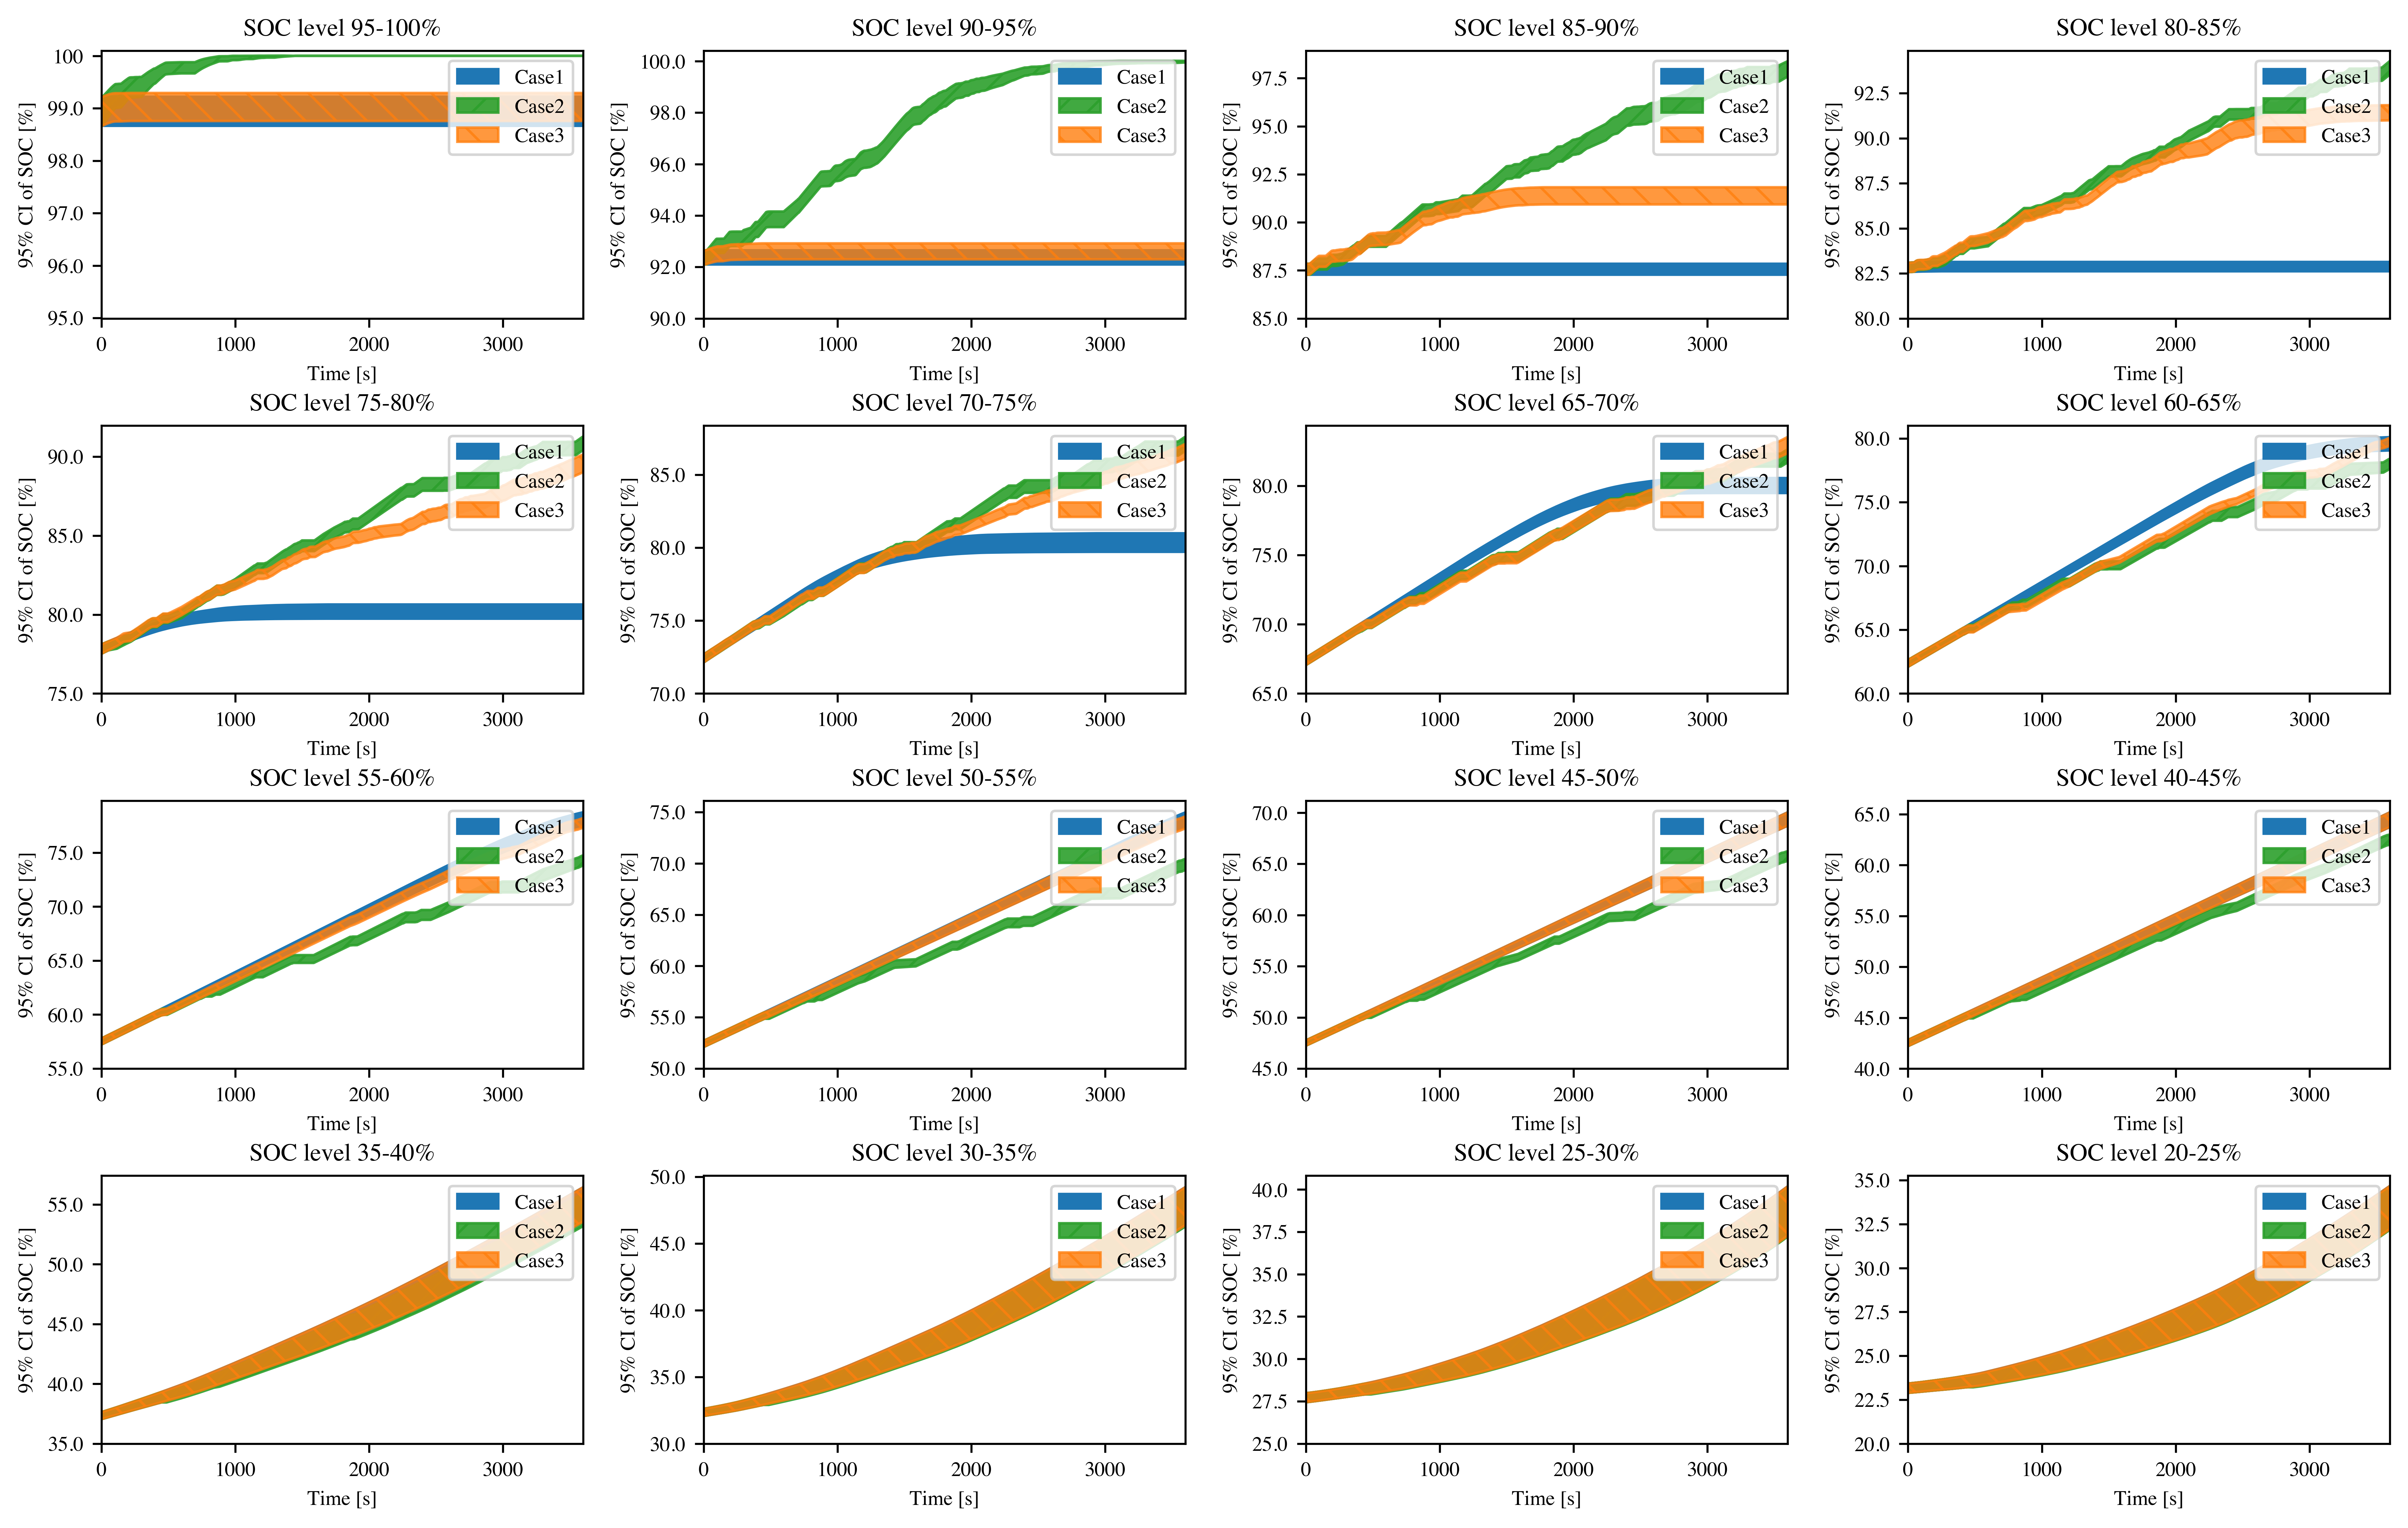

In [15]:
col_index = []
for k in range(0, 16):
    col_index = col_index + [list(np.array(range(0, 100)) + 100*k)]
col = []
for c in col_index:
    col = col + [list(evsocf.columns[[c]].values)]

fig, ax = plt.subplots(4, 4, figsize=(16, 10))
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.25, hspace=0.4)



alpha=0.8
for i in range(4):
    for j in range(4):
        idx = 15 - (4*i + j)
        ax[i, j].fill_between(range(3600), linestyle='-', color='tab:blue', hatch='||', alpha=1, label=f'Case1',
                              y1=evsocs[col[idx]].mean(axis=1) + 1.96 * evsocs[col[idx]].sem(axis=1),
                              y2=evsocs[col[idx]].mean(axis=1) - 1.96 * evsocs[col[idx]].sem(axis=1))
        ax[i, j].fill_between(range(3600), linestyle='-', color='tab:green', hatch='//', alpha=0.9, label=f'Case2',
                              y1=evsocfn[col[idx]].mean(axis=1) + 1.96 * evsocfn[col[idx]].sem(axis=1),
                              y2=evsocfn[col[idx]].mean(axis=1) - 1.96 * evsocfn[col[idx]].sem(axis=1))
        ax[i, j].fill_between(range(3600), linestyle='-', color='tab:orange', hatch='\\\\', alpha=0.8, label=f'Case3',
                              y1=evsocf[col[idx]].mean(axis=1) + 1.96 * evsocf[col[idx]].sem(axis=1),
                              y2=evsocf[col[idx]].mean(axis=1) - 1.96 * evsocf[col[idx]].sem(axis=1))
        ax[i, j].legend()
        ax[i, j].set_xlim([0, 3600])
        ax[i, j].set_xlabel('Time [s]')
        ax[i, j].set_ylabel('95% CI of SOC [%]')
        yticks = list(ax[i, j].get_yticks())
        ax[i, j].set_yticks(yticks[0:-1], [np.round(ytk*100, 4) for ytk in yticks[0:-1]])
        ax[i, j].set_title(f'SOC level {idx*5+20}-{idx*5+25}%')
#         ax[i, j].set_ylim([0.58, 1.02])

ax[0, 0].set_ylim([0.9499, 1.001])
ax[0, 0].set_yticks([0.95, 0.96, 0.97, 0.98, 0.99, 1], [np.round(ytk*100, 4) for ytk in [0.95, 0.96, 0.97, 0.98, 0.99, 1]])
# ax[0, 1].set_ylim([0.899, 0.9501])
# ax[0, 1].set_yticks([0.9, 0.91, 0.92, 0.93, 0.94, 0.95], [np.round(ytk*100, 4) for ytk in [0.9, 0.91, 0.92, 0.93, 0.94, 0.95]])
# ax[0, 2].set_ylim([0.849, 0.901])
# ax[0, 2].set_yticks([0.85, 0.86, 0.87, 0.88, 0.89, 0.9], [np.round(ytk*100, 4) for ytk in [0.85, 0.86, 0.87, 0.88, 0.89, 0.9]])

/Users/jinningwang/Documents/work/mambaforge/envs/andes/lib/python3.9/site-packages/pandas/core/indexes/base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


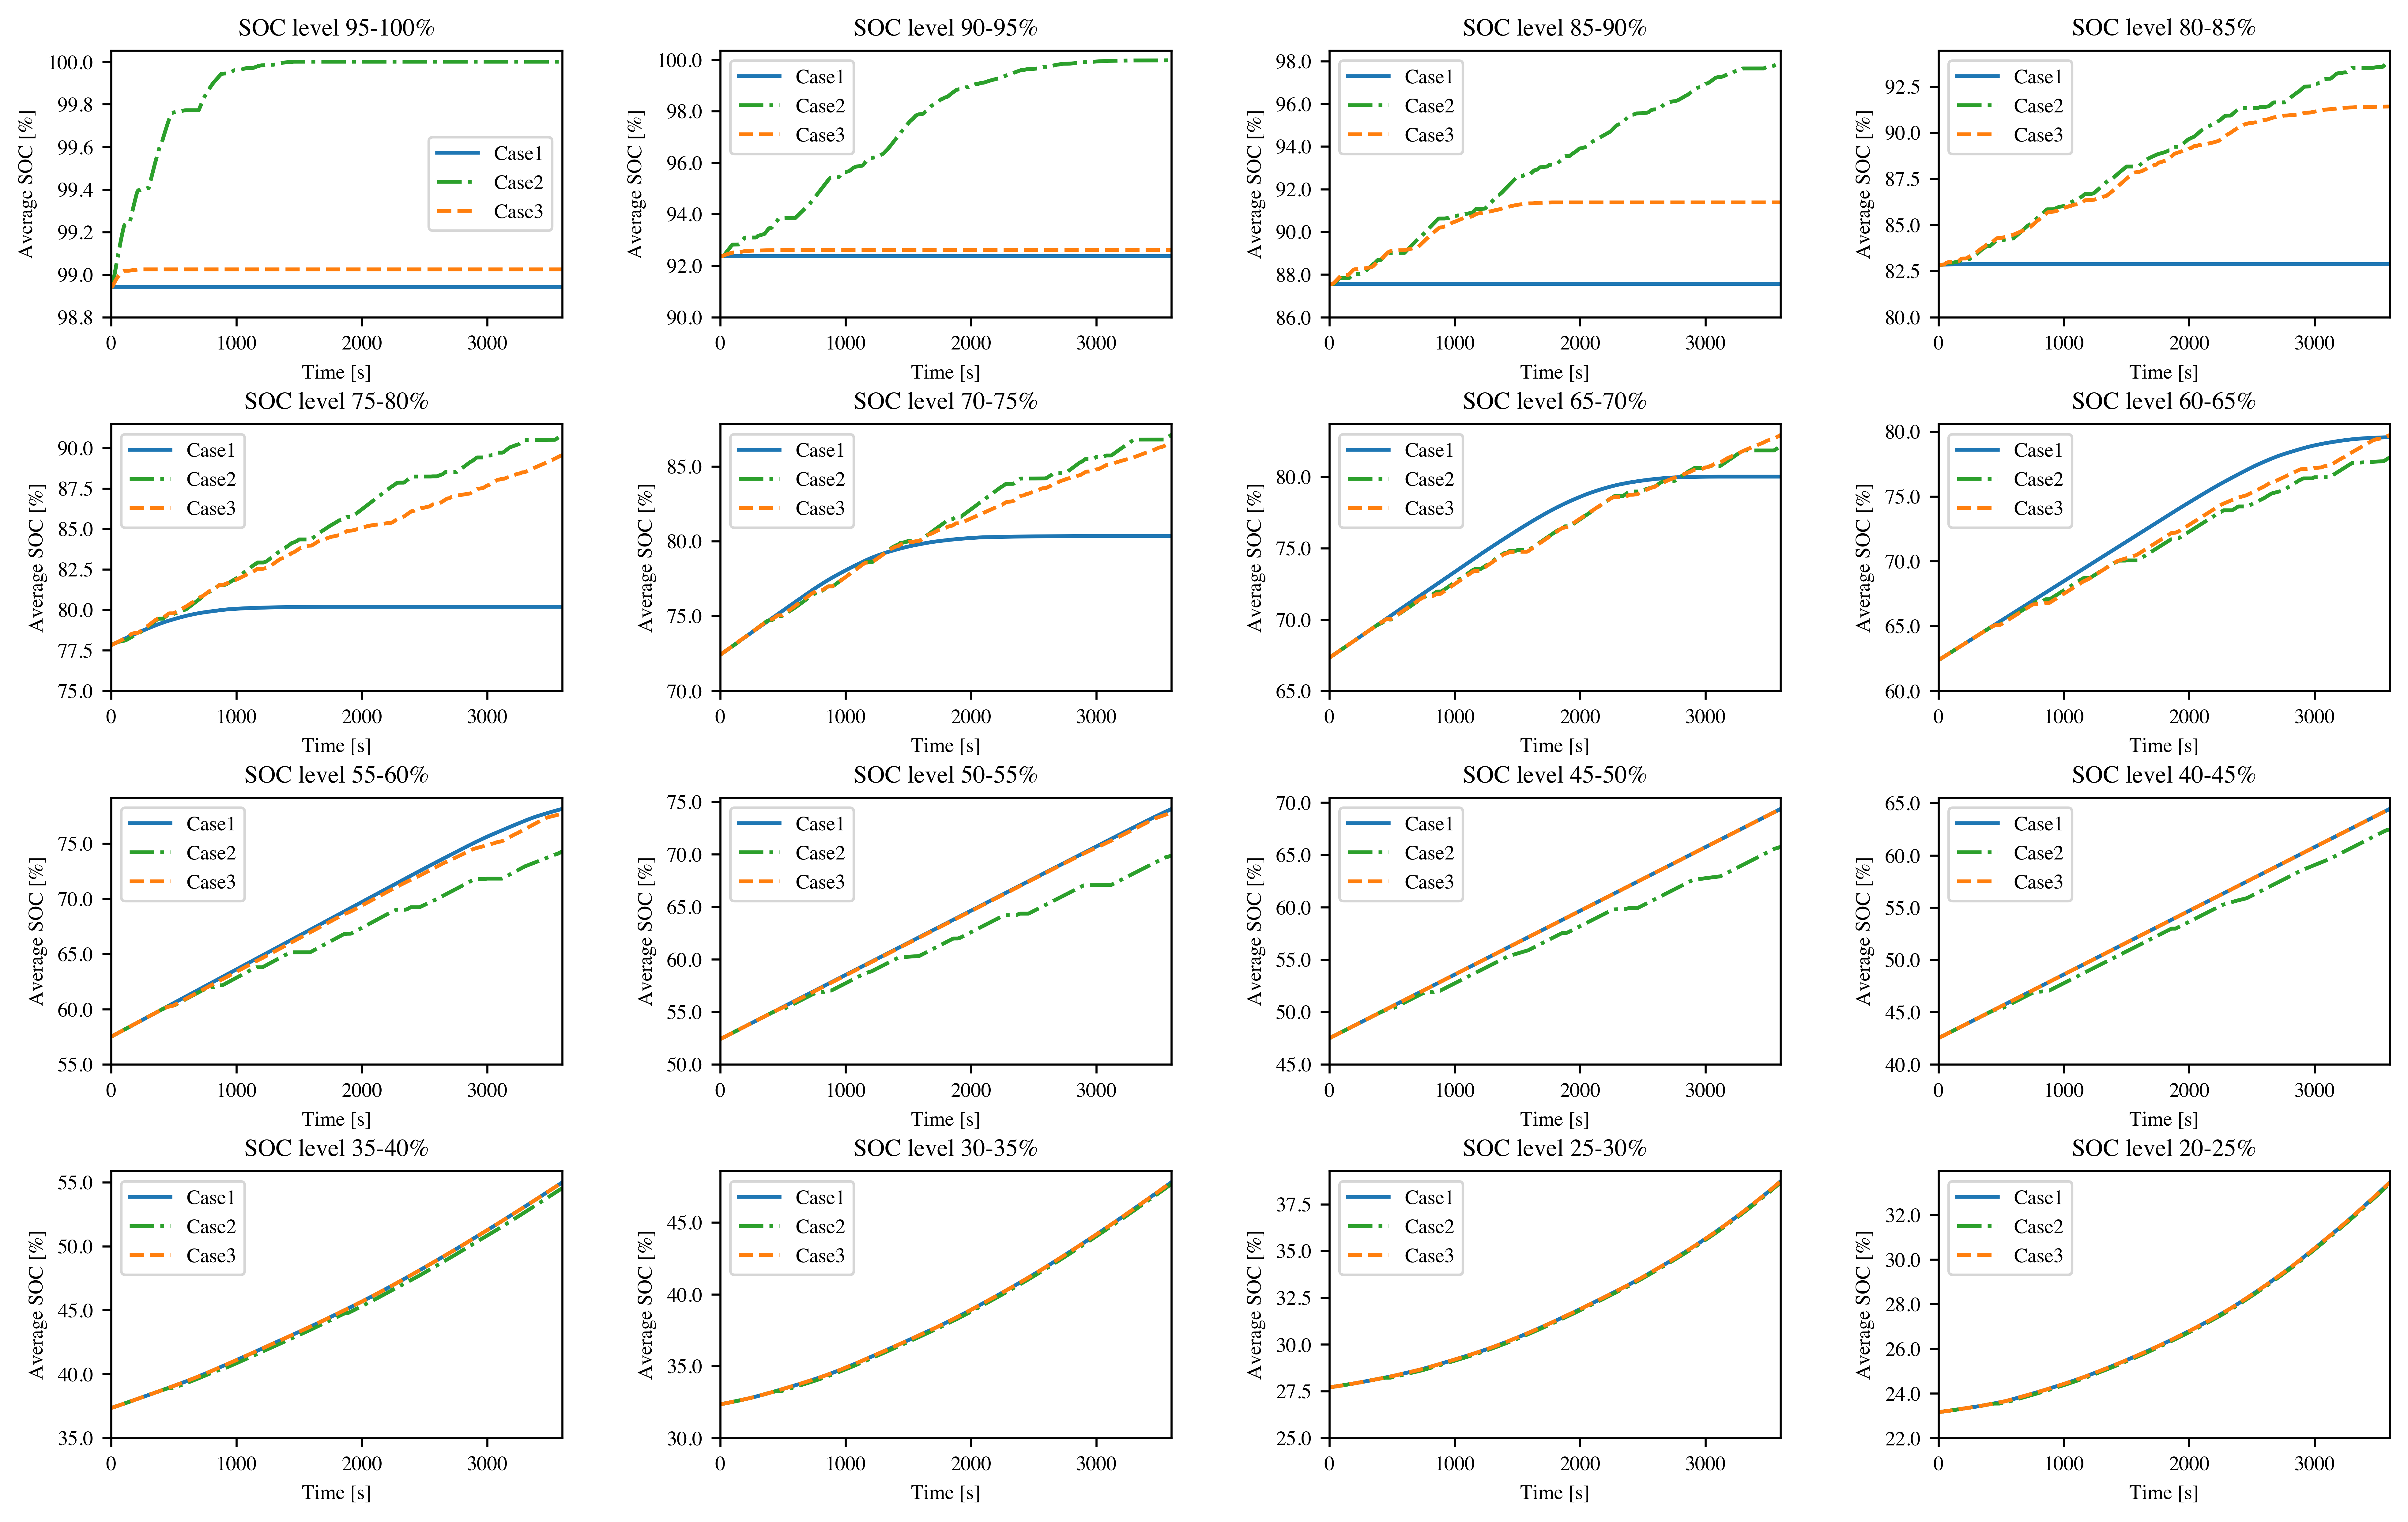

In [16]:
col_index = []
for k in range(0, 16):
    col_index = col_index + [list(np.array(range(0, 100)) + 100*k)]
col = []
for c in col_index:
    col = col + [list(evsocf.columns[[c]].values)]

fig, ax = plt.subplots(4, 4, figsize=(16, 10))
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.35, hspace=0.4)

for i in range(4):
    for j in range(4):
        idx = 15 - (4*i + j)
        ax[i, j].plot(range(3600), evsocs[col[idx]].mean(axis=1), linestyle='-', color='tab:blue', label=f'Case1')
        ax[i, j].plot(range(3600), evsocfn[col[idx]].mean(axis=1), linestyle='-.', color='tab:green', label=f'Case2')
        ax[i, j].plot(range(3600), evsocf[col[idx]].mean(axis=1), linestyle='--', color='tab:orange', label=f'Case3')
        ax[i, j].legend()
        ax[i, j].set_xlim([0, 3600])
        ax[i, j].set_xlabel('Time [s]')
        ax[i, j].set_ylabel('Average SOC [%]')
        yticks = list(ax[i, j].get_yticks())
        ax[i, j].set_yticks(yticks[0:-1], [np.round(ytk*100, 4) for ytk in yticks[0:-1]])
        ax[i, j].set_title(f'SOC level {idx*5+20}-{idx*5+25}%')
#         ax[i, j].set_ylim([0.58, 1.02])

In [17]:
epsilon = 18
k = 10 * ssa.ACEc.bias.v / epsilon / epsilon # mHz
length = 60

outscp = outs.copy()
outscp['Time'] = outscp['Time'] / length
outscp['Time'] = outscp['Time'].astype(int)
outscp = outscp.groupby('Time').mean()
outscp['prod'] = 100* (2 - k * outscp['ACE'] * outscp['fd'])

outfncp = outfn.copy()
outfncp['Time'] = outfncp['Time'] / length
outfncp['Time'] = outfncp['Time'].astype(int)
outfncp = outfncp.groupby('Time').mean()
outfncp['prod'] = 100* (2 - k * outfncp['ACE'] * outfncp['fd'])

outfcp = outf.copy()
outfcp['Time'] = outfcp['Time'] / length
outfcp['Time'] = outfcp['Time'].astype(int)
outfcp = outfcp.groupby('Time').mean()
outfcp['prod'] = 100* (2 - k * outfcp['ACE'] * outfcp['fd'])

print(f"Case1={outscp['prod'].mean()}, Case2={outfncp['prod'].mean()}, Case3={outfcp['prod'].mean()}")

# fig, ax = plt.subplots(figsize=(3.5, 3))
# outscp.plot(y='prod', kind='kde', color='tab:blue', linestyle='-',
#             legend=False, linewidth=1, fig=fig, ax=ax, label='Case1')
# outhcp.plot(y='prod', kind='kde', color='tab:green', linestyle='-',
#             legend=False, linewidth=1, fig=fig, ax=ax, label='Case2')
# outfcp.plot(y='prod', kind='kde', color='tab:orange', linestyle='--',
#             legend=False, linewidth=1, fig=fig, ax=ax, label='Case3')
# ax.legend()
# ax.set_xlabel('CPS1')
# outscp.plot(y='prod', kind='hist', density=True, bins=30, color='tab:blue',
#             legend=False, fig=fig, ax=ax, label='Case1')
# outfcp.plot(y='prod', kind='hist', density=True, bins=30, color='tab:orange',
#             legend=False, fig=fig, ax=ax, label='Case2')

Case1=409.69074983390806, Case2=468.0711646502988, Case3=429.7577719957819


In [18]:
# --- generation cost ---
gtf = 0
gts = 0
gtfn = 0
for i in pgf.index:
    cf = ssd.cost.c2.values * np.power(pgf.loc[i].values, 2) \
        + ssd.cost.c1.values * pgf.loc[i].values \
        + ssd.cost.c1.values
    cs = ssd.cost.c2.values * np.power(pgs.loc[i].values, 2) \
        + ssd.cost.c1.values * pgs.loc[i].values \
        + ssd.cost.c1.values
    cfn = ssd.cost.c2.values * np.power(pgfn.loc[i].values, 2) \
        + ssd.cost.c1.values * pgfn.loc[i].values \
        + ssd.cost.c1.values
    gtf += np.sum(cf)
    gts += np.sum(cs)
    gtfn += np.sum(cfn)

# --- SFR mileage cost ---
ftf = 0
fts = 0
ftfn = 0
for i in agcf.columns:
    cf = ssd.cost.c1.abs().values * agcf[i].values
    cs = ssd.cost.c1.abs().values * agcs[i].values
    cfn = ssd.cost.c1.abs().values * agcfn[i].values
    ftf += np.sum(cf)
    fts += np.sum(cs)
    ftfn += np.sum(cfn)

print(f"Total Mile: Case1={np.round(agcs.sum().sum(), 2)}, Case2={np.round(agcfn.sum().sum(), 2)}, Case3={np.round(agcf.sum().sum(), 2)}")
print(f"EV AGC Mile: Case1={agcs.loc[9].sum()}, Case2={agcfn.loc[9].sum()}, Case3={agcf.loc[9].sum()}")
print(f"Total cost: Case1={np.round(gts+fts, 2)}, Case2={np.round(gtfn+ftfn, 2)}, Case3={np.round(gtf+ftf, 2)}")

Total Mile: Case1=14098.06, Case2=17479.0, Case3=14797.69
EV AGC Mile: Case1=0.0, Case2=4280.916952420805, Case3=1434.5504671548529
Total cost: Case1=296050.43, Case2=320813.3, Case3=295688.78


Freq. D.: case1=0.011585190438314331, case2=0.012468304904798565, case3=0.01190878250018971
ACE D.: case1=40.51749932859343, case2=43.599308569181595, case3=41.64016397537492


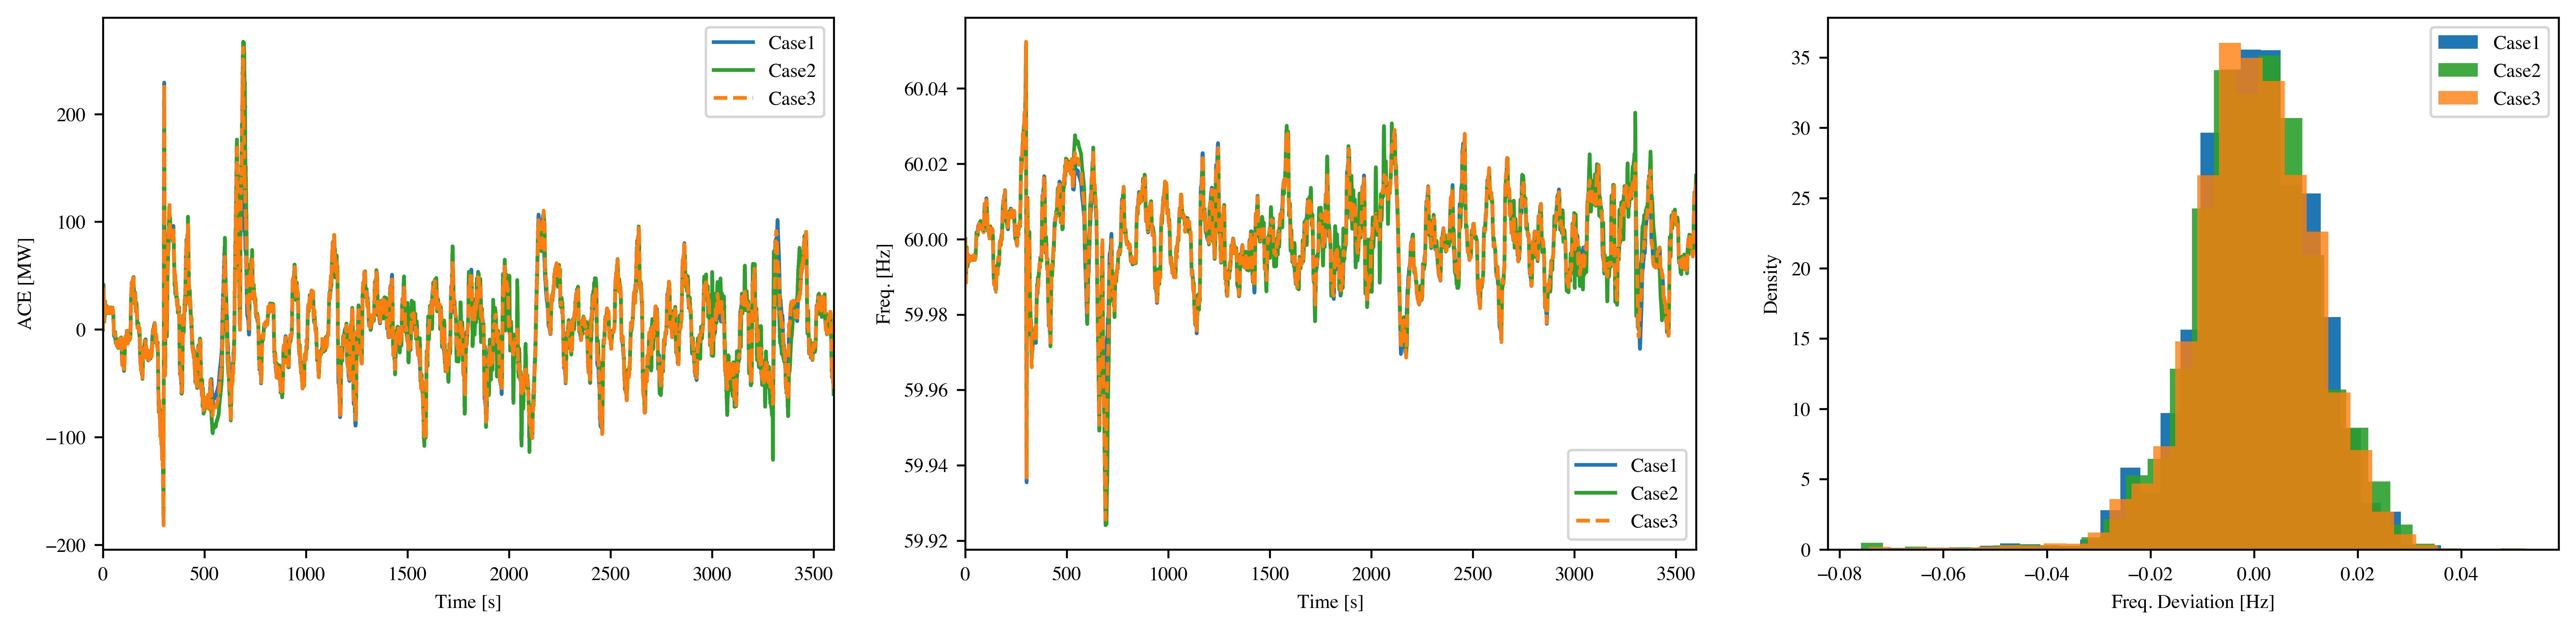

In [19]:
plt.style.use('ieee')
fig, ax = plt.subplots(1, 3, figsize=(18, 4))
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.18, hspace=None)
# ACE
outs.plot(x='Time', y='ACE', ax=ax[0], fig=fig, label='Case1', linestyle='-', color='tab:blue')
outfn.plot(x='Time', y='ACE', ax=ax[0], fig=fig, label='Case2', linestyle='-', color='tab:green')
outf.plot(x='Time', y='ACE', ax=ax[0], fig=fig, label='Case3', linestyle='--', color='tab:orange')
# COI freq.
outs.plot(x='Time', y='freq', ax=ax[1], fig=fig, label='Case1', linestyle='-', color='tab:blue')
outfn.plot(x='Time', y='freq', ax=ax[1], fig=fig, label='Case2', linestyle='-', color='tab:green')
outf.plot(x='Time', y='freq', ax=ax[1], fig=fig, label='Case3', linestyle='--', color='tab:orange')
# COI std.
outs.plot(x='Time', y='fd', kind='hist', density=True, bins=30, color='tab:blue', alpha=1,
          legend=False, linewidth=1, fig=fig, ax=ax[2], label='Case1')
outfn.plot(x='Time', y='fd', kind='hist', density=True, bins=30, color='tab:green', alpha=0.9,
          legend=False, linewidth=1, fig=fig, ax=ax[2], label='Case2')
outf.plot(x='Time', y='fd', kind='hist', density=True, bins=30, color='tab:orange', alpha=0.8,
          legend=False, linewidth=1, fig=fig, ax=ax[2], label='Case3')
# outs.plot(x='Time', y='fd', kind='kde', color='tab:blue',
#           legend=False, fig=fig, ax=ax[2], label='Case1')
# outfn.plot(x='Time', y='fd', kind='kde', color='tab:green',
#           legend=False, fig=fig, ax=ax[2], label='Case2')
# outf.plot(x='Time', y='fd', kind='kde', color='tab:orange',
#           legend=False, fig=fig, ax=ax[2], label='Case3')

ax[0].set_xlim([0, 3600])
ax[1].set_xlim([0, 3600])
ax[0].set_xlabel('Time [s]')
ax[1].set_xlabel('Time [s]')
ax[0].set_ylabel('ACE [MW]')
ax[1].set_ylabel('Freq. [Hz]')
ax[2].set_xlabel('Freq. Deviation [Hz]')
ax[2].set_ylabel('Density')
ax[2].legend()

print(f"Freq. D.: case1={outs['fd'].std()}, case2={outfn['fd'].std()}, case3={outf['fd'].std()}")
print(f"ACE D.: case1={outs['ACE'].std()}, case2={outfn['ACE'].std()}, case3={outf['ACE'].std()}")

No SFR, if soc >= socd
SFR, soc < socd
incldue all EVs, 
delayed_time = (socd - soc) * Q / Pc / nc
  
total_charging_time (soc_init + soc_gap -> scod)


In [20]:
# evif[['soc0', 'socf', 'socd', 'socgap', 'Q', 'Pc', 'dt', 'nc']]

In [21]:
import matplotlib.font_manager

Text(0, 0.5, 'G3 AGC response [MW]')

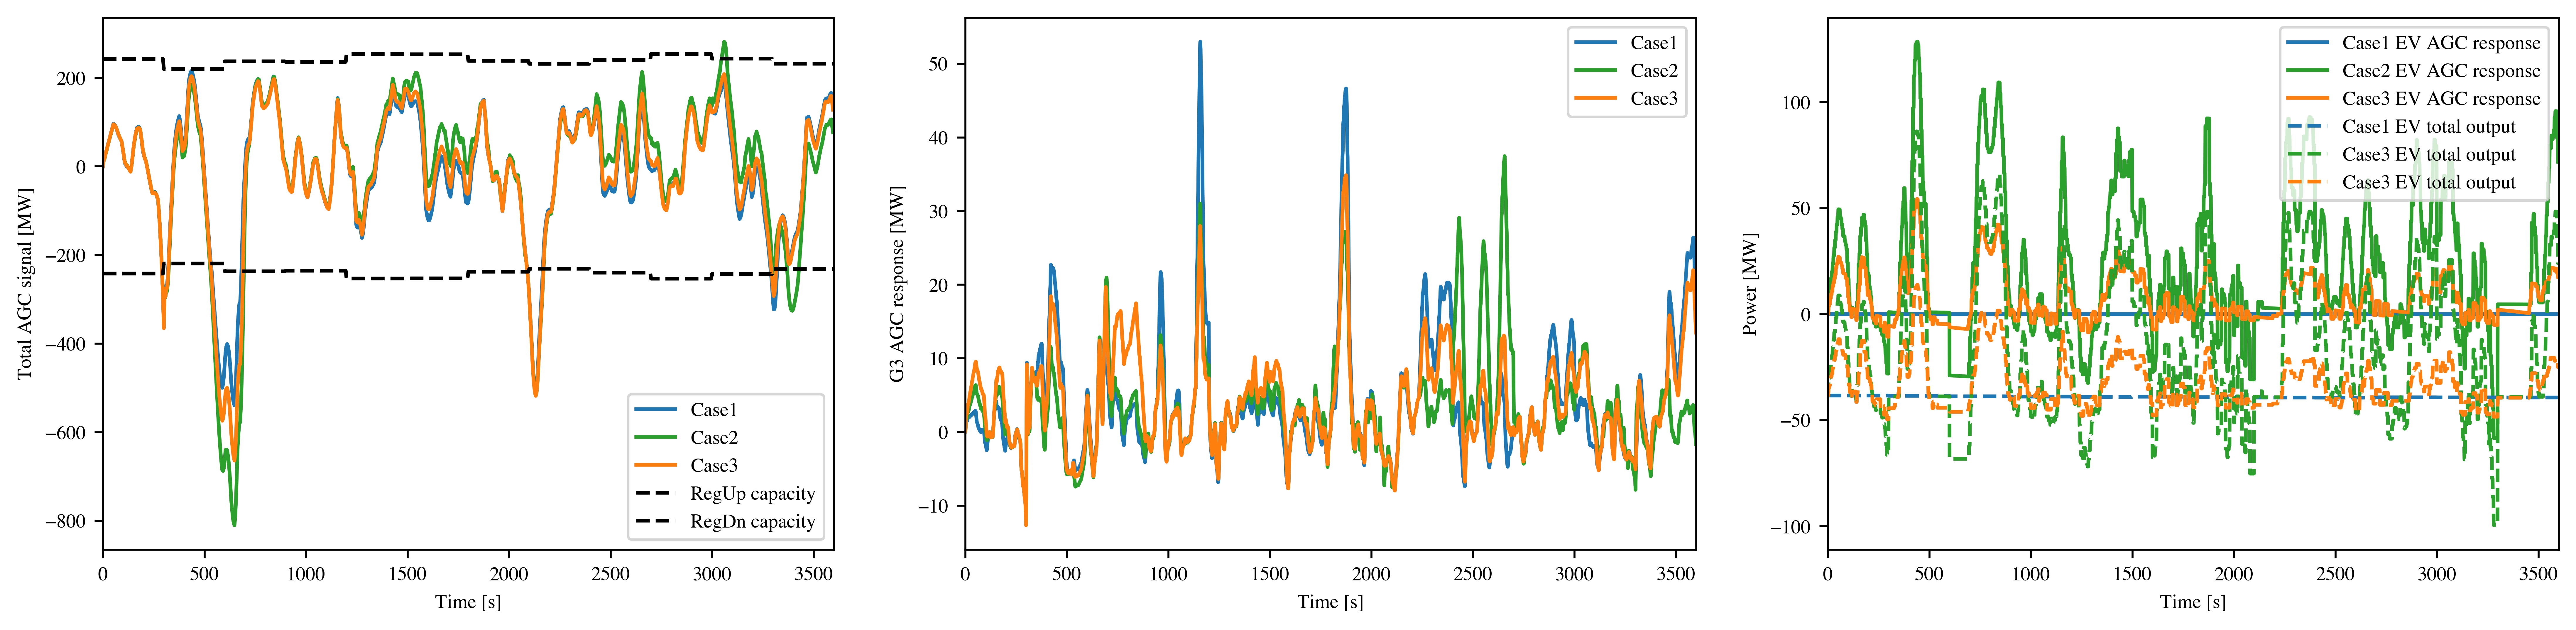

In [22]:
plt.style.use('ieee')
fig, ax = plt.subplots(1, 3, figsize=(18, 4))
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.18, hspace=None)

evs.plot(y=['Prc'], label=['Case1 EV AGC response'], linestyle='-', color='tab:blue', ax=ax[2], fig=fig)
evfn.plot(y=['Prc'], label=['Case2 EV AGC response'], linestyle='-', color='tab:green', ax=ax[2], fig=fig)
evf.plot(y=['Prc'], label=['Case3 EV AGC response'], linestyle='-', color='tab:orange', ax=ax[2], fig=fig)
evs.plot(y=['Pt'], label=['Case1 EV total output'], linestyle='--', color='tab:blue', ax=ax[2], fig=fig)
evfn.plot(y=['Pt'], label=['Case3 EV total output'], linestyle='--', color='tab:green', ax=ax[2], fig=fig)
evf.plot(y=['Pt'], label=['Case3 EV total output'], linestyle='--', color='tab:orange', ax=ax[2], fig=fig)
ax[2].legend()
ax[2].set_xlim([0, 3600])
ax[2].set_xlabel('Time [s]')
ax[2].set_ylabel('Power [MW]')

sfrs.plot(x='time', y='ace', ax=ax[0], fig=fig, label='Case1', linestyle='-', color='tab:blue')
sfrfn.plot(x='time', y='ace', ax=ax[0], fig=fig, label='Case2', linestyle='-', color='tab:green')
sfrf.plot(x='time', y='ace', ax=ax[0], fig=fig, label='Case3', linestyle='-', color='tab:orange')
sfrs.plot(x='time', y='up', ax=ax[0], fig=fig, label='RegUp capacity', linestyle='--', color='black')
sfrs.plot(x='time', y='dn', ax=ax[0], fig=fig, label='RegDn capacity', linestyle='--', color='black')
ax[0].set_xlim([0, 3600])
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Total AGC signal [MW]')

outs.plot(x='Time', y='paux9', ax=ax[1], fig=fig, label='Case1', linestyle='-', color='tab:blue')
outfn.plot(x='Time', y='paux9', ax=ax[1], fig=fig, label='Case2', linestyle='-', color='tab:green')
outf.plot(x='Time', y='paux9', ax=ax[1], fig=fig, label='Case3', linestyle='-', color='tab:orange')
ax[1].set_xlim([0, 3600])
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('G3 AGC response [MW]')

/var/folders/06/z8ws9b2d733f7h6yc5qpn22w0000gn/T/ipykernel_80966/1216912222.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{np.round(i*100,0)}%' for i in np.arange(0, 1.1, 0.2)])


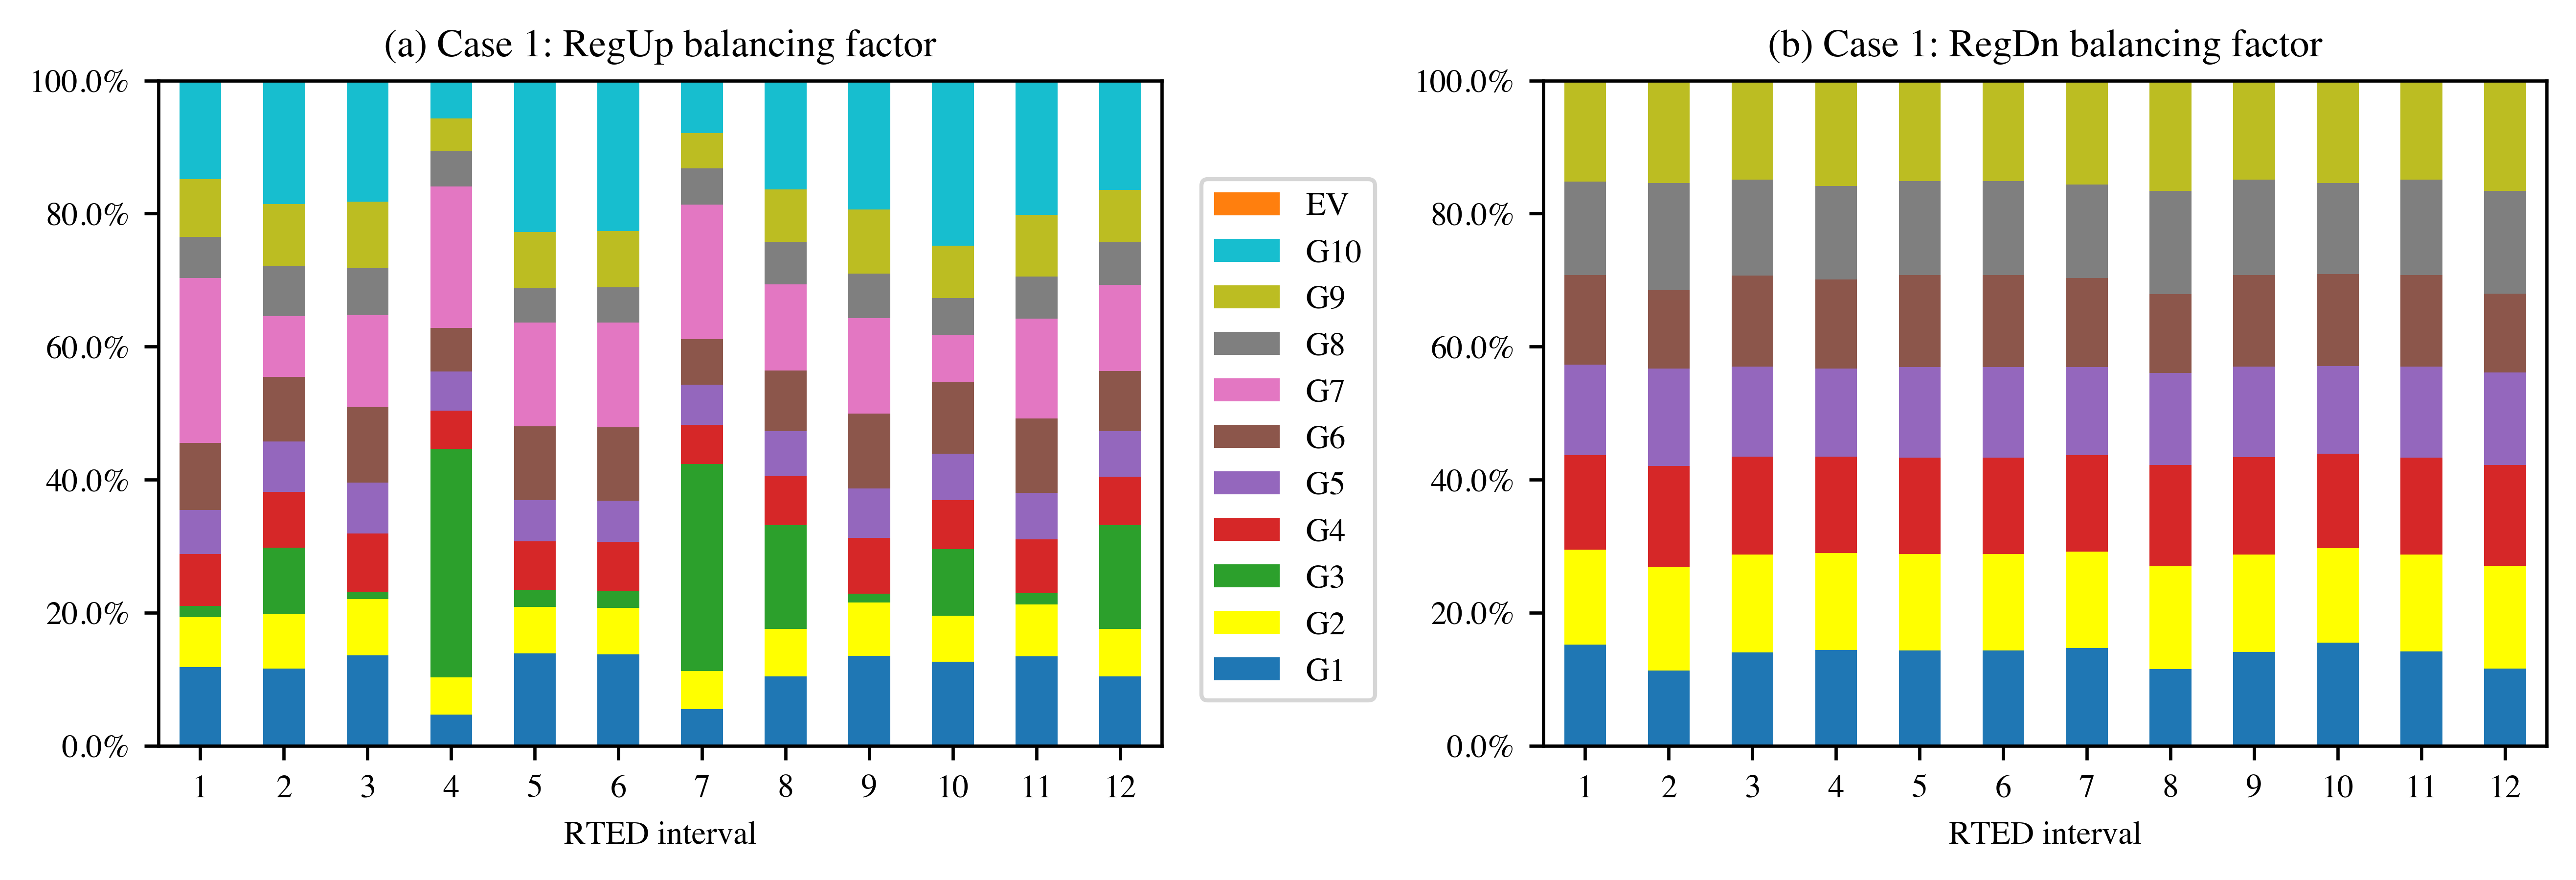

In [23]:
plt.style.use('ieee')

bu_df = pd.read_csv('cosim_18_S_bu.csv')
bd_df = pd.read_csv('cosim_18_S_bd.csv')

color = ['tab:blue', 'yellow', 'tab:green',
         'tab:red', 'tab:purple', 'tab:brown',
         'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:orange']

figs, axes = plt.subplots(1, 2, figsize=(10.5, 3))
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.38, hspace=None)
new_cols = ['PV_1', 'PV_2', 'PV_3', 'PV_4', 'PV_5', 'PV_6',
            'PV_7', 'PV_8', 'PV_9', 'Slack_10', 'PV_10']
bu_df[new_cols].plot.bar(stacked=True, ax=axes[0], legend=False, color=color)
bd_df[new_cols].plot.bar(stacked=True, ax=axes[1], legend=False, color=color)

for ax in axes:
    ax.tick_params(axis='x', labelrotation = 0)
    ax.set_ylim([0, 1])
    ax.set_yticklabels([f'{np.round(i*100,0)}%' for i in np.arange(0, 1.1, 0.2)])
    ax.set_xticklabels([i for i in range(1,13,1)])
    ax.set_xlabel('RTED interval')
axes[0].set_title('(a) Case 1: RegUp balancing factor')
axes[1].set_title('(b) Case 1: RegDn balancing factor')
lines_labels = [ax.get_legend_handles_labels() for ax in axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
line_plot = lines[0:11]
line_plot.reverse()
label_g = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'EV']
label_g.reverse()
figs.legend(line_plot, label_g, loc='center')

/var/folders/06/z8ws9b2d733f7h6yc5qpn22w0000gn/T/ipykernel_80966/4068592367.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{np.round(i*100,0)}%' for i in np.arange(0, 1.1, 0.2)])


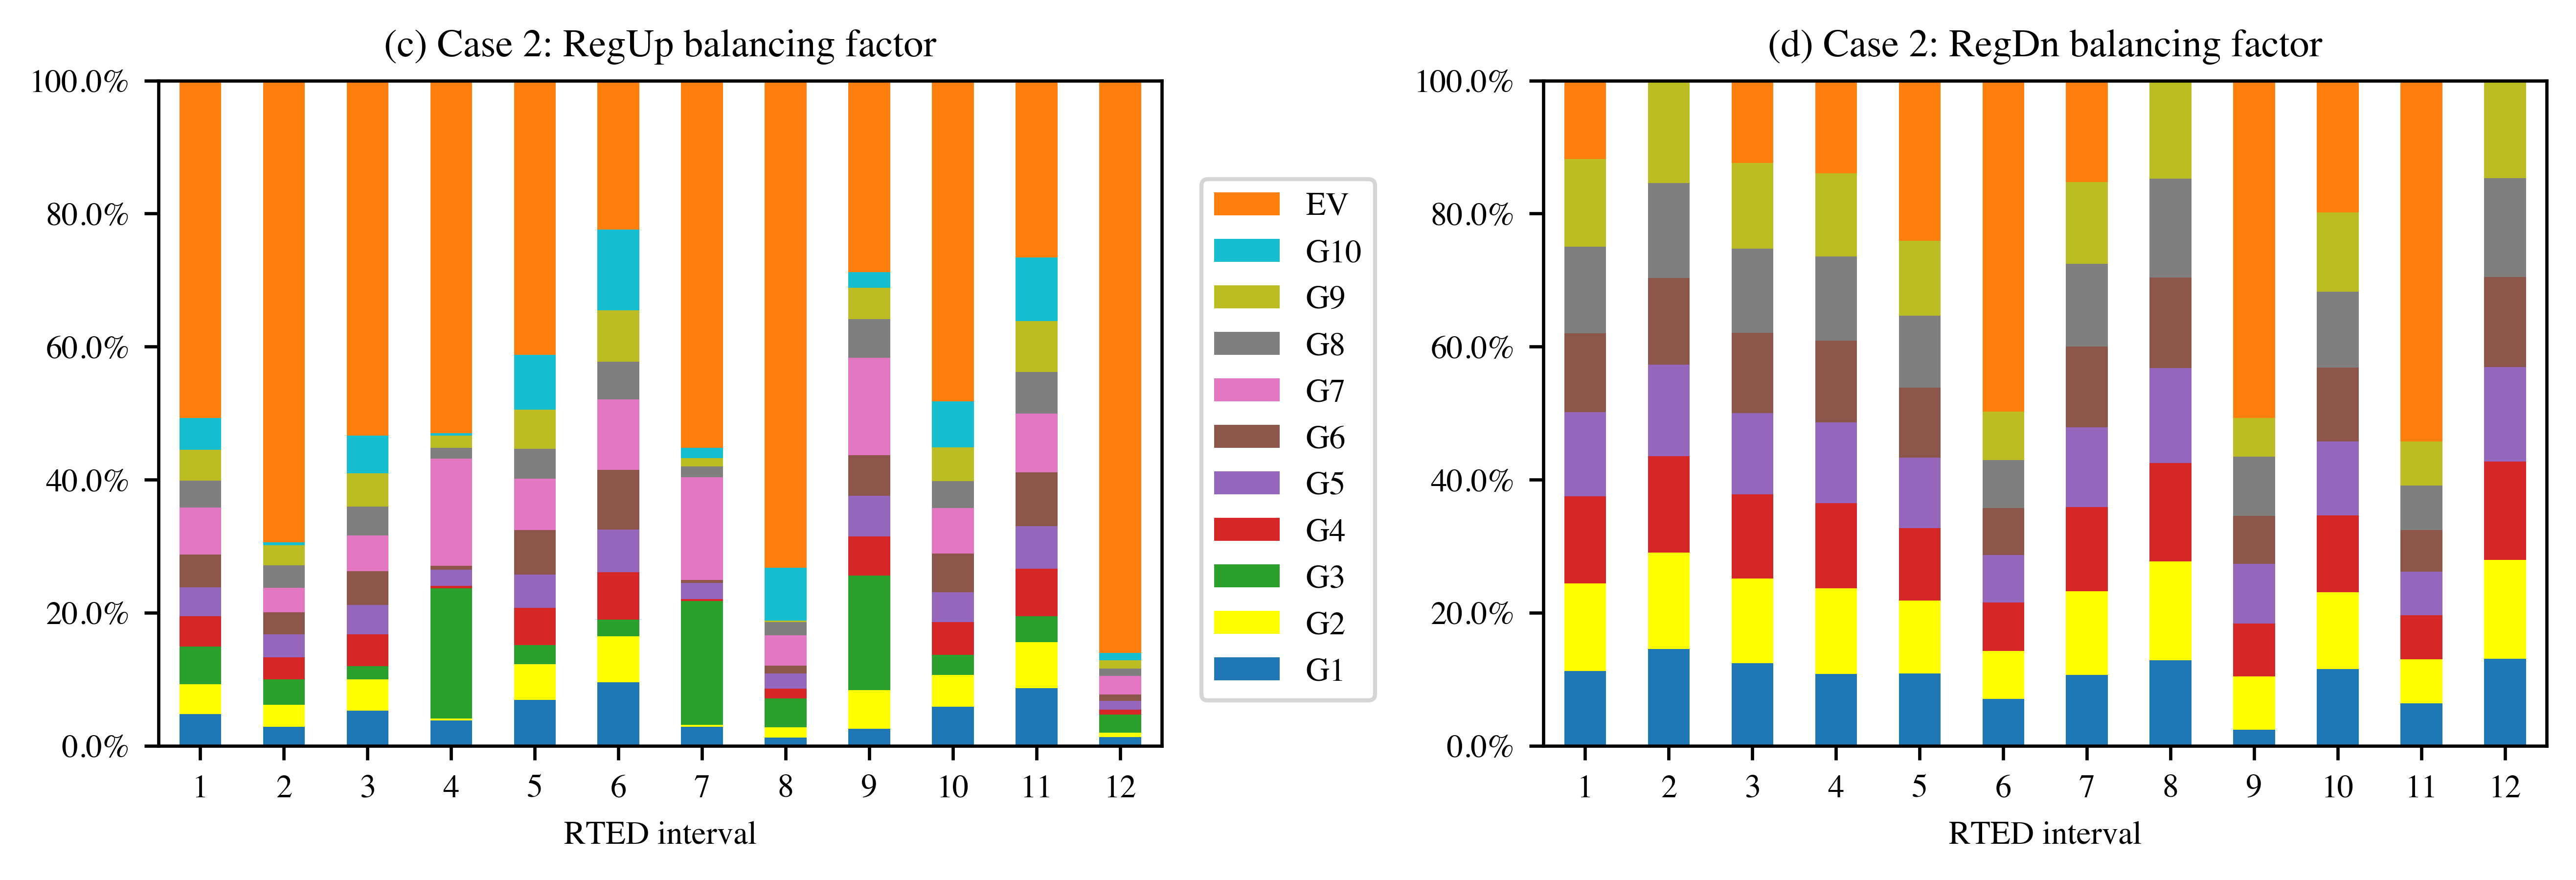

In [24]:
plt.style.use('ieee')

bu_df = pd.read_csv('cosim_18_F_bu.csv')
bd_df = pd.read_csv('cosim_18_F_bd.csv')

color = ['tab:blue', 'yellow', 'tab:green',
         'tab:red', 'tab:purple', 'tab:brown',
         'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:orange']

figs, axes = plt.subplots(1, 2, figsize=(10.5, 3))
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.38, hspace=None)
new_cols = ['PV_1', 'PV_2', 'PV_3', 'PV_4', 'PV_5', 'PV_6',
            'PV_7', 'PV_8', 'PV_9', 'Slack_10', 'PV_10']
bu_df[new_cols].plot.bar(stacked=True, ax=axes[0], legend=False, color=color)
bd_df[new_cols].plot.bar(stacked=True, ax=axes[1], legend=False, color=color)

for ax in axes:
    ax.tick_params(axis='x', labelrotation = 0)
    ax.set_ylim([0, 1])
    ax.set_yticklabels([f'{np.round(i*100,0)}%' for i in np.arange(0, 1.1, 0.2)])
    ax.set_xticklabels([i for i in range(1,13,1)])
    ax.set_xlabel('RTED interval')
axes[0].set_title('(c) Case 2: RegUp balancing factor')
axes[1].set_title('(d) Case 2: RegDn balancing factor')
lines_labels = [ax.get_legend_handles_labels() for ax in axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
line_plot = lines[0:11]
line_plot.reverse()
label_g = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'EV']
label_g.reverse()
figs.legend(line_plot, label_g, loc='center')

/var/folders/06/z8ws9b2d733f7h6yc5qpn22w0000gn/T/ipykernel_80966/2794434502.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{np.round(i*100,0)}%' for i in np.arange(0, 1.1, 0.2)])


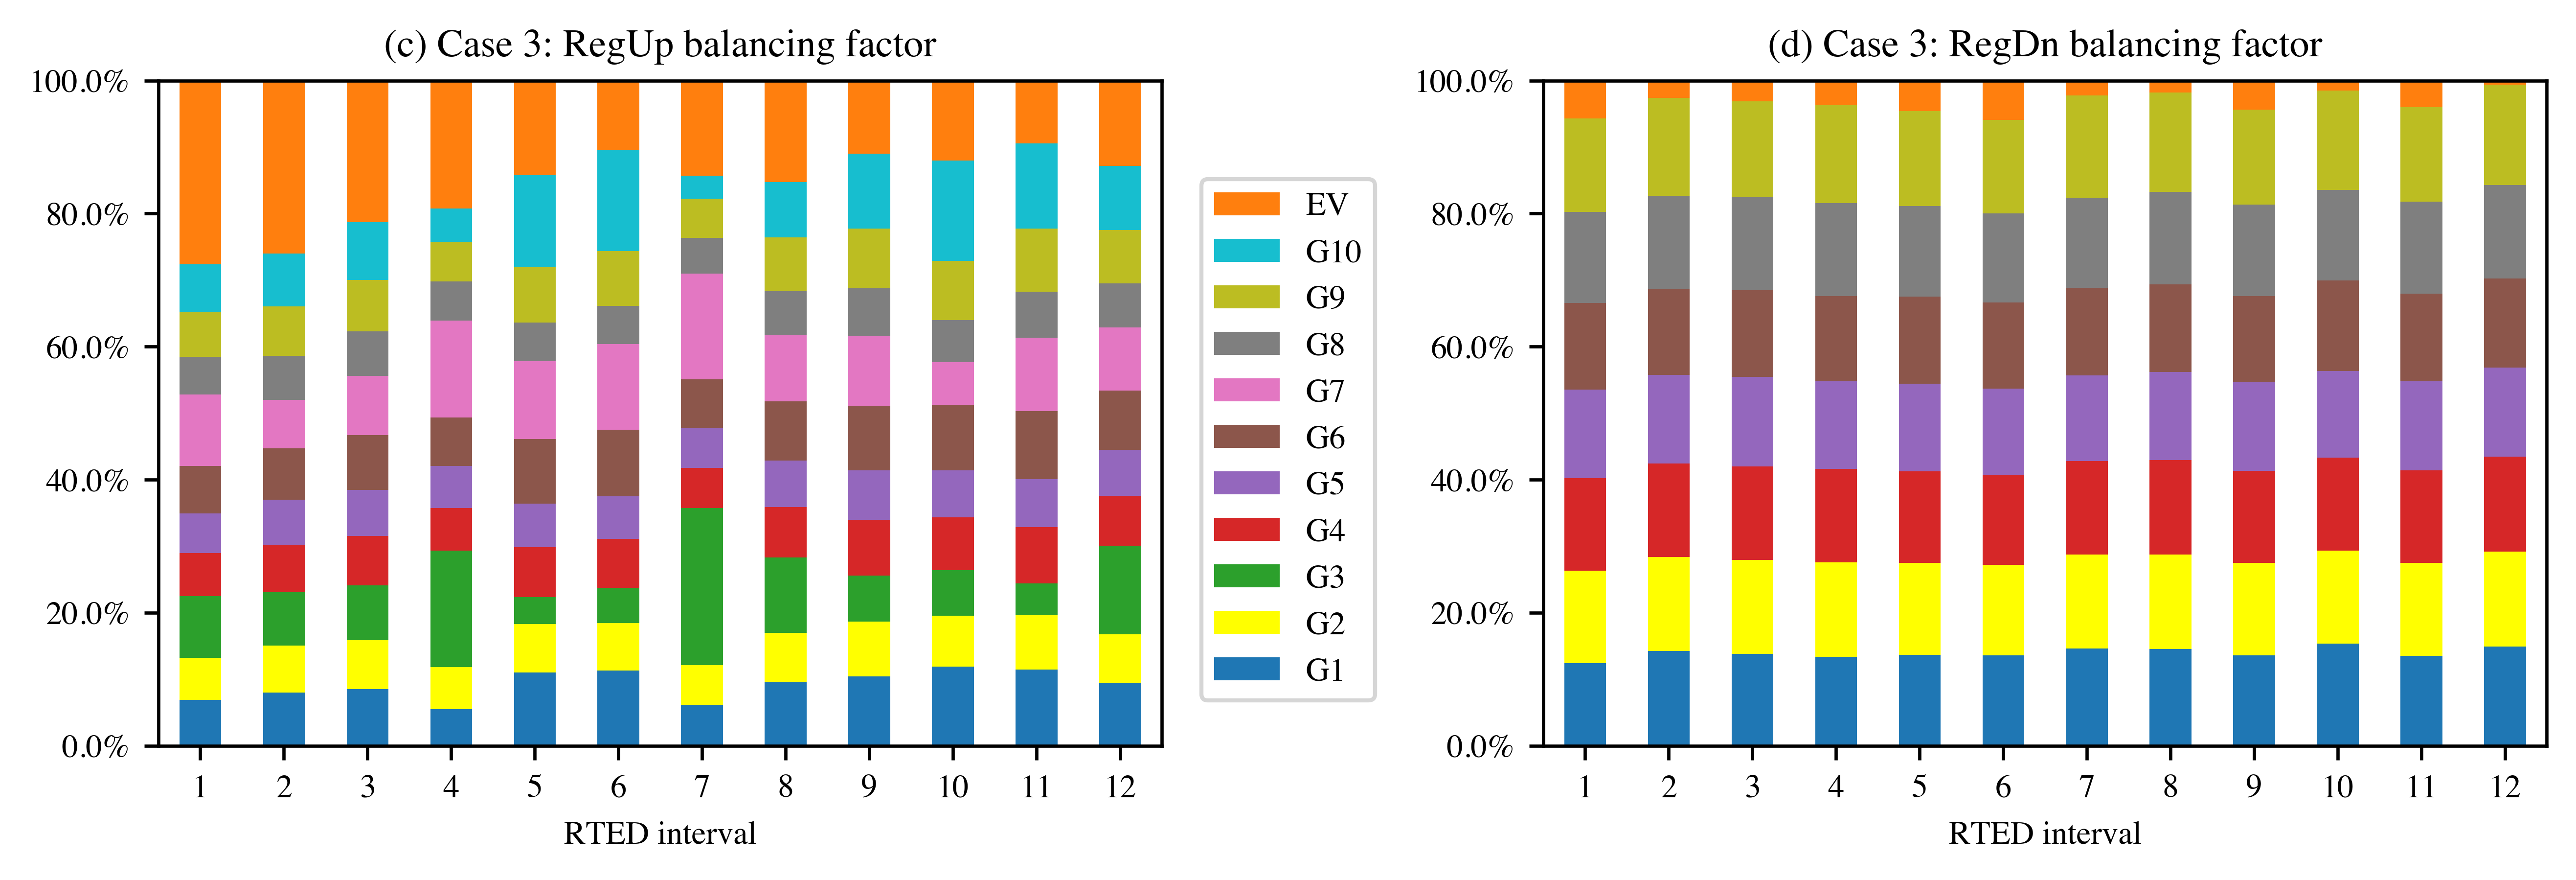

In [25]:
plt.style.use('ieee')

bu_df = pd.read_csv('cosim_18_F_ict_bu.csv')
bd_df = pd.read_csv('cosim_18_F_ict_bd.csv')

color = ['tab:blue', 'yellow', 'tab:green',
         'tab:red', 'tab:purple', 'tab:brown',
         'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:orange']

figs, axes = plt.subplots(1, 2, figsize=(10.5, 3))
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.38, hspace=None)
new_cols = ['PV_1', 'PV_2', 'PV_3', 'PV_4', 'PV_5', 'PV_6',
            'PV_7', 'PV_8', 'PV_9', 'Slack_10', 'PV_10']
bu_df[new_cols].plot.bar(stacked=True, ax=axes[0], legend=False, color=color)
bd_df[new_cols].plot.bar(stacked=True, ax=axes[1], legend=False, color=color)

for ax in axes:
    ax.tick_params(axis='x', labelrotation = 0)
    ax.set_ylim([0, 1])
    ax.set_yticklabels([f'{np.round(i*100,0)}%' for i in np.arange(0, 1.1, 0.2)])
    ax.set_xticklabels([i for i in range(1,13,1)])
    ax.set_xlabel('RTED interval')
axes[0].set_title('(c) Case 3: RegUp balancing factor')
axes[1].set_title('(d) Case 3: RegDn balancing factor')
lines_labels = [ax.get_legend_handles_labels() for ax in axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
line_plot = lines[0:11]
line_plot.reverse()
label_g = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'EV']
label_g.reverse()
figs.legend(line_plot, label_g, loc='center')